In [87]:
!pip install pandas

In [88]:
pip install plotly geopandas

Note: you may need to restart the kernel to use updated packages.


In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_is_fitted
import plotly.express as px

import plotly.express as px
import json
from pandas.plotting import table




In [90]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [91]:
pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [92]:
df = pd.read_excel('kenya_sgbv_dt_2020_2024.xlsx',skiprows=1)

In [93]:
df.head()

,County,"0-11Yrs, Male 2020","0-11Yrs, Female 2020",Total Male & Female 0-11Yrs 2020,"12-17Yrs, Male 2020","12-17Yrs, Female 2020","Total Male & Female 12-17Yrs, 2020","18-49Yrs, Male 2020","18-49Yrs, Female 2020","Total Male & Female 18-49Yrs, 2020",...,"12-17Yrs, Male 2023","12-17Yrs, Female 2023","Total Male & Female 12-17Yrs, 2023","18-49Yrs, Male 2023","18-49Yrs, Female 2023","Total Male & Female 18-49Yrs, 2023","50 Yrs and above, Male 2023","50 Yrs and above, Female 2023","Total Male & Female 50 Yrs and above, 2023",Total cases presented in 2023
0,Baringo,NaN,NaN,0,NaN,1.0,1.0,NaN,1.0,1.0,...,NaN,9.0,9.0,2.0,23.0,25.0,1.0,5.0,6.0,NaN
1,Bomet,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,0.0,...,5.0,59.0,64.0,9.0,39.0,48.0,NaN,2.0,2.0,NaN
2,Bungoma,2.0,69.0,71,7.0,396.0,403.0,17.0,97.0,114.0,...,16.0,332.0,348.0,22.0,196.0,218.0,10.0,12.0,22.0,NaN
3,Busia,1.0,29.0,30,7.0,130.0,137.0,5.0,39.0,44.0,...,6.0,145.0,151.0,32.0,152.0,184.0,6.0,37.0,43.0,NaN
4,Elgeyo Marakwet,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,11.0,11.0,6.0,18.0,24.0,1.0,3.0,4.0,NaN


In [94]:
df = df.fillna(0)

In [95]:
# Melt the DataFrame
long_df = pd.melt(df, id_vars=['County'], 
                   var_name='Year_Age_Gender', 
                   value_name='Cases')

# Function to split column names correctly
def split_column_name(col_name):
    parts = col_name.split(',')
    if len(parts) == 2:
        age_group = parts[0]
        gender = parts[1].split('_')[0]  # Take the first part before any additional underscore
    else:
        # Handle columns without expected comma separation or additional formats
        age_group = col_name
        gender = 'Unknown'
    return pd.Series([age_group, gender])

# Apply the function to the 'Year_Age_Gender' column
long_df[['Age_Group', 'Gender']] = long_df['Year_Age_Gender'].apply(split_column_name)

# Extract Year from the 'Year_Age_Gender' column
# Check for year pattern and handle missing years
long_df['Year'] = long_df['Year_Age_Gender'].str.extract(r'(\d{4})')

# Drop the original 'Year_Age_Gender' column
long_df.drop(columns=['Year_Age_Gender'], inplace=True)

# Pivot the DataFrame to get the desired format
pivot_df = long_df.pivot_table(index=['County', 'Year'], 
                               columns=['Age_Group', 'Gender'], 
                               values='Cases', 
                               aggfunc='sum').reset_index()

# Flatten multi-level columns
pivot_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in pivot_df.columns.values]

# Display the resulting DataFrame
print(pivot_df.head())

    County_ Year_  0-11Yrs_  Female 2020  0-11Yrs_  Female 2021  \
0  Baringo   2020                    0.0                    NaN   
1  Baringo   2021                    NaN                    0.0   
2  Baringo   2022                    NaN                    NaN   
3  Baringo   2023                    NaN                    NaN   
4    Bomet   2020                    0.0                    NaN   

   0-11Yrs_  Female 2022  0-11Yrs_  Female 2023  0-11Yrs_ Male 2020  \
0                    NaN                    NaN                 0.0   
1                    NaN                    NaN                 NaN   
2                    7.0                    NaN                 NaN   
3                    NaN                    5.0                 NaN   
4                    NaN                    NaN                 0.0   

   0-11Yrs_ Male 2021  0-11Yrs_ Male 2022  0-11Yrs_ Male 2023  ...  \
0                 NaN                 NaN                 NaN  ...   
1                 0.0         

In [96]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   County_                                     192 non-null    object 
 1   Year_                                       192 non-null    object 
 2   0-11Yrs_  Female 2020                       48 non-null     float64
 3   0-11Yrs_  Female 2021                       48 non-null     float64
 4   0-11Yrs_  Female 2022                       48 non-null     float64
 5   0-11Yrs_  Female 2023                       48 non-null     float64
 6   0-11Yrs_ Male 2020                          48 non-null     float64
 7   0-11Yrs_ Male 2021                          48 non-null     float64
 8   0-11Yrs_ Male 2022                          48 non-null     float64
 9   0-11Yrs_ Male 2023                          48 non-null     float64
 10  12-17Yrs_  Fem

In [97]:
pivot_df.head()

,County_,Year_,0-11Yrs_ Female 2020,0-11Yrs_ Female 2021,0-11Yrs_ Female 2022,0-11Yrs_ Female 2023,0-11Yrs_ Male 2020,0-11Yrs_ Male 2021,0-11Yrs_ Male 2022,0-11Yrs_ Male 2023,...,Total Male & Female 18-49Yrs_ 2023,Total Male & Female 18-49Yrs_ Male 2022,Total Male & Female 50 Yrs and above_ 2020,Total Male & Female 50 Yrs and above_ 2021,Total Male & Female 50 Yrs and above_ 2022,Total Male & Female 50 Yrs and above_ 2023,Total cases presented in 2020_Unknown,Total cases presented in 2021_Unknown,Total cases presented in 2022_Unknown,Total cases presented in 2023_Unknown
0,Baringo,2020,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,Baringo,2021,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2,Baringo,2022,NaN,NaN,7.0,NaN,NaN,NaN,0.0,NaN,...,NaN,22.0,NaN,NaN,2.0,NaN,NaN,NaN,0.0,NaN
3,Baringo,2023,NaN,NaN,NaN,5.0,NaN,NaN,NaN,0.0,...,25.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,0.0
4,Bomet,2020,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


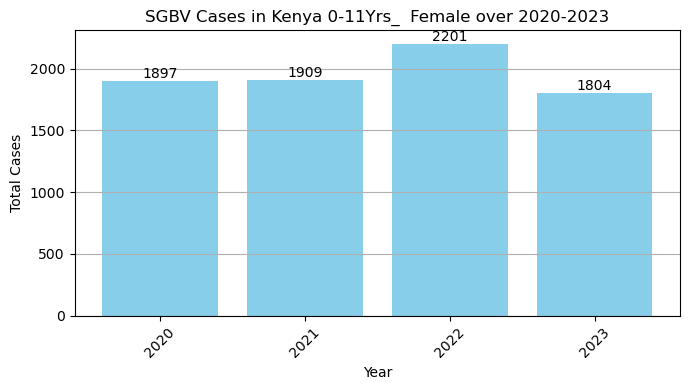

In [98]:
years = [col[-4:] for col in pivot_df.columns if '0-11Yrs_  Female' in col]
values = [pivot_df[col].sum() for col in pivot_df.columns if '0-11Yrs_  Female' in col]

# Plotting
plt.figure(figsize=(7, 4))
bars = plt.bar(years, values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('SGBV Cases in Kenya 0-11Yrs_  Female over 2020-2023')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate the bars with their respective values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
# Save the plot as a PDF
plt.savefig("SGBV Cases in Kenya 0-11Yrs_  Female over 2020-2023.pdf", format='pdf')
plt.show()


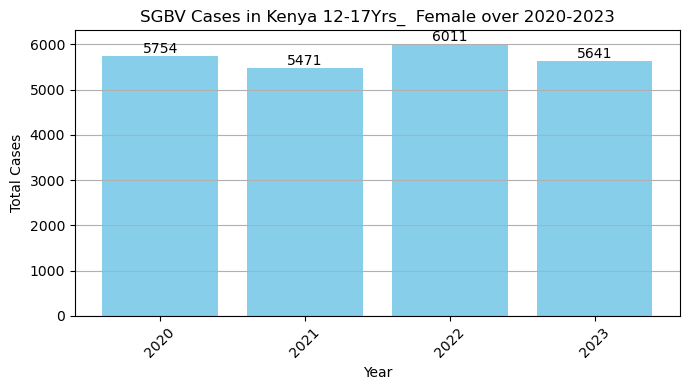

In [99]:
years = [col[-4:] for col in pivot_df.columns if '12-17Yrs_  Female' in col]
values = [pivot_df[col].sum() for col in pivot_df.columns if '12-17Yrs_  Female' in col]

# Plotting
plt.figure(figsize=(7, 4))
bars = plt.bar(years, values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('SGBV Cases in Kenya 12-17Yrs_  Female over 2020-2023')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate the bars with their respective values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
# Save the plot as a PDF
plt.savefig("SGBV Cases in Kenya 12-17Yrs_  Female over 2020-2023.pdf", format='pdf')
plt.show()


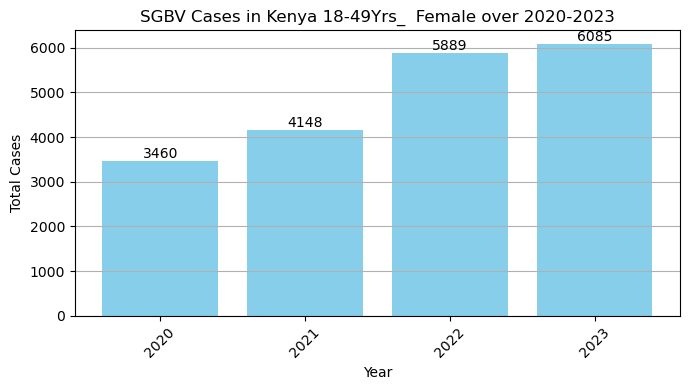

In [100]:
years = [col[-4:] for col in pivot_df.columns if '18-49Yrs_  Female' in col]
values = [pivot_df[col].sum() for col in pivot_df.columns if '18-49Yrs_  Female' in col]

# Plotting
plt.figure(figsize=(7, 4))
bars = plt.bar(years, values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('SGBV Cases in Kenya 18-49Yrs_  Female over 2020-2023')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate the bars with their respective values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.savefig("SGBV Cases in Kenya 18-49Yrs_  Female over 2020-2023.pdf", format='pdf')
plt.show()


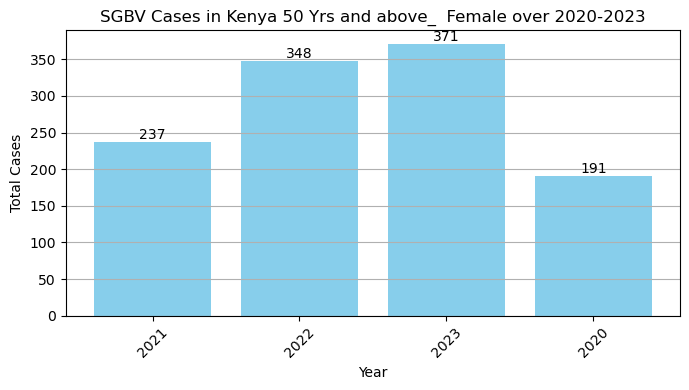

In [101]:
years = [col[-4:] for col in pivot_df.columns if '50 Yrs and above_  Female' in col]
values = [pivot_df[col].sum() for col in pivot_df.columns if '50 Yrs and above_  Female' in col]

# Plotting
plt.figure(figsize=(7, 4))
bars = plt.bar(years, values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('SGBV Cases in Kenya 50 Yrs and above_  Female over 2020-2023')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate the bars with their respective values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.savefig("SGBV Cases in Kenya 50 Yrs and above_  Female over 2020-2023.pdf", format='pdf')
plt.show()


### __SGBV CASES IN KENYA  0-11YRS_MALE FROM 2020 - 2023__

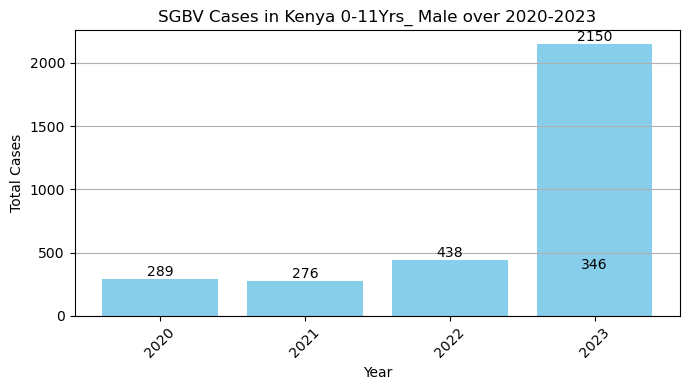

In [102]:
years = [col[-4:] for col in pivot_df.columns if '0-11Yrs_ Male' in col]
values = [pivot_df[col].sum() for col in pivot_df.columns if '0-11Yrs_ Male' in col]

# Plotting
plt.figure(figsize=(7, 4))
bars = plt.bar(years, values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('SGBV Cases in Kenya 0-11Yrs_ Male over 2020-2023')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate the bars with their respective values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.savefig("SGBV Cases in Kenya 0-11Yrs_ Male over 2020-2023.pdf", format='pdf')
plt.show()


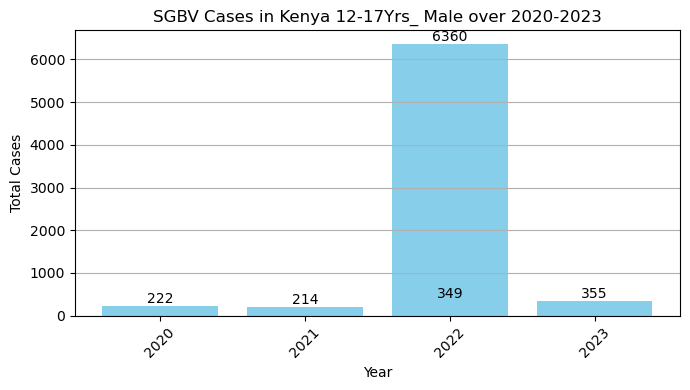

In [103]:
years = [col[-4:] for col in pivot_df.columns if '12-17Yrs_ Male' in col]
values = [pivot_df[col].sum() for col in pivot_df.columns if '12-17Yrs_ Male' in col]

# Plotting
plt.figure(figsize=(7, 4))
bars = plt.bar(years, values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('SGBV Cases in Kenya 12-17Yrs_ Male over 2020-2023')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate the bars with their respective values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.savefig("SGBV Cases in Kenya 12-17Yrs_ Male over 2020-2023.pdf", format='pdf')
plt.show()


### __SGBV CASES IN KENYA  12-17YRS_MALE FROM 2020 - 2023__

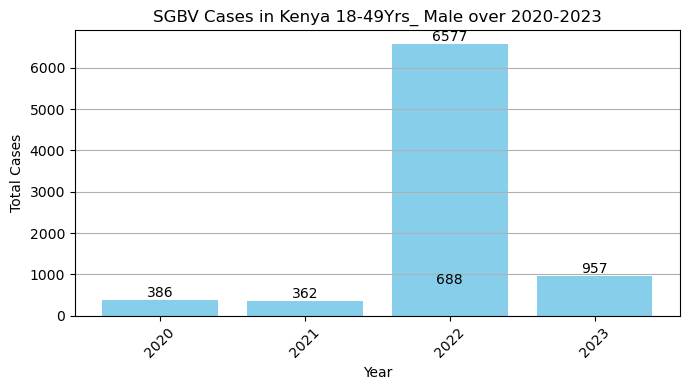

In [104]:
years = [col[-4:] for col in pivot_df.columns if '18-49Yrs_ Male' in col]
values = [pivot_df[col].sum() for col in pivot_df.columns if '18-49Yrs_ Male' in col]

# Plotting
plt.figure(figsize=(7, 4))
bars = plt.bar(years, values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('SGBV Cases in Kenya 18-49Yrs_ Male over 2020-2023')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate the bars with their respective values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.savefig("SGBV Cases in Kenya 18-49Yrs_ Male over 2020-2023.pdf", format='pdf')
plt.show()


### __SGBV CASES IN KENYA  50YRSANDABOVE_MALE FROM 2020 - 2023__

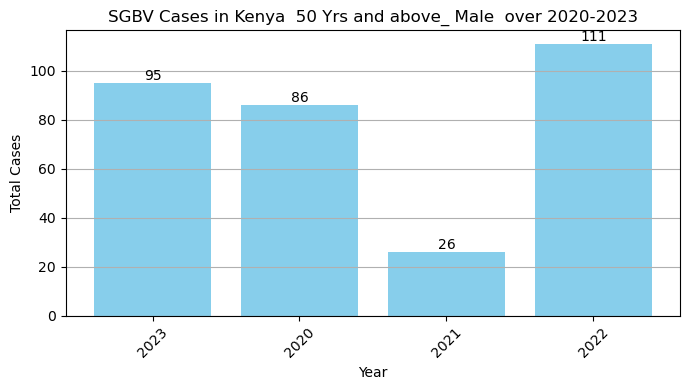

In [105]:
years = [col[-4:] for col in pivot_df.columns if '50 Yrs and above_ Male' in col]
values = [pivot_df[col].sum() for col in pivot_df.columns if '50 Yrs and above_ Male' in col]

# Plotting
plt.figure(figsize=(7, 4))
bars = plt.bar(years, values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('SGBV Cases in Kenya  50 Yrs and above_ Male  over 2020-2023')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate the bars with their respective values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.savefig("SGBV Cases in Kenya  50 Yrs and above_ Male  over 2020-2023.pdf", format='pdf')
plt.show()


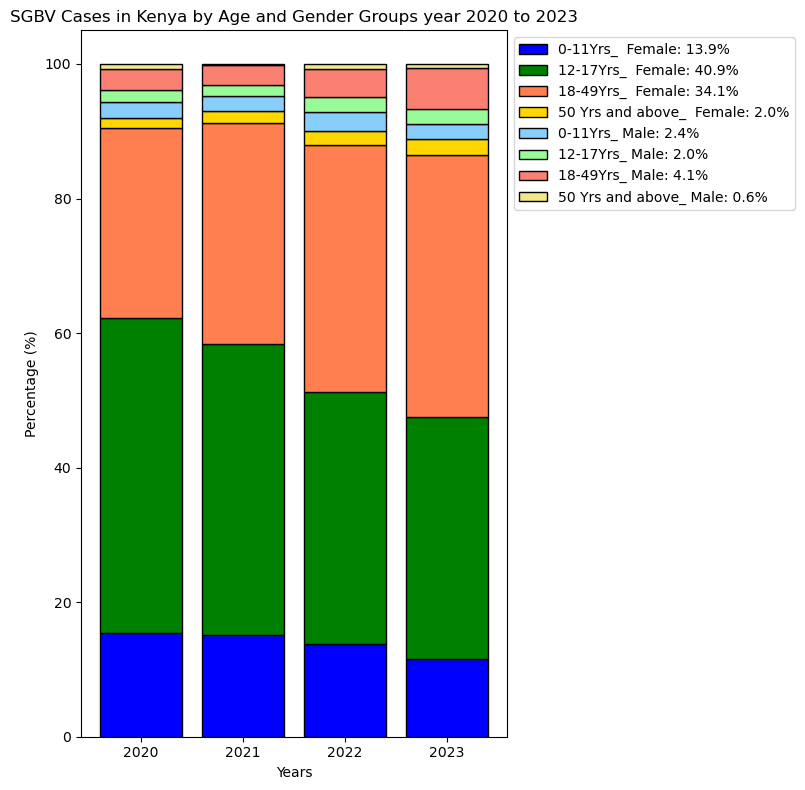

In [123]:
# Define the age-gender categories you want to plot
age_gender_columns = [
    '0-11Yrs_  Female', '12-17Yrs_  Female', '18-49Yrs_  Female', '50 Yrs and above_  Female',
    '0-11Yrs_ Male', '12-17Yrs_ Male', '18-49Yrs_ Male', '50 Yrs and above_ Male'
]

# Define years
years = ['2020', '2021', '2022', '2023']

# Initialize lists to hold data for each age-gender group
data_per_age_gender = {col: [] for col in age_gender_columns}

# Loop over each year and sum the data for each age-gender group
for year in years:
    for col in age_gender_columns:
        col_with_year = f"{col.strip()} {year}"
        if col_with_year in pivot_df.columns:
            data_per_age_gender[col].append(pivot_df[col_with_year].sum())
        else:
            data_per_age_gender[col].append(0)

# Convert the data to a list of lists for stacking
stacked_data = np.array([data_per_age_gender[col] for col in age_gender_columns])

# Normalize the data to 100% for each year
total_per_year = stacked_data.sum(axis=0)
stacked_data_percentage = stacked_data / total_per_year * 100

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Define colors for each age group (distinguish between male and female)
female_colors = ['blue', 'green', 'coral', 'gold']
male_colors = ['lightskyblue', 'palegreen', 'salmon', 'khaki']
colors = female_colors + male_colors

# Stack each age group on top of the previous one
bottom = np.zeros(len(years))  # Start with an empty bottom
for i, col in enumerate(age_gender_columns):
    bars = ax.bar(years, stacked_data_percentage[i], bottom=bottom, label=col, color=colors[i], edgecolor='black')
    bottom += stacked_data_percentage[i]  # Update the bottom for the next stack

# Compute average percentages for legend labels
average_percentages = np.mean(stacked_data_percentage, axis=1)
legend_labels = [f"{col}: {avg:.1f}%" for col, avg in zip(age_gender_columns, average_percentages)]

# Add a legend with percentages
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), labels=legend_labels)

# Set labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Percentage (%)')
ax.set_title('SGBV Cases in Kenya by Age and Gender Groups year 2020 to 2023')

# Show the plot
plt.tight_layout()
plt.show()

In [124]:
# Compute total for each category
total_sum = {col: sum(values) for col, values in data_per_age_gender.items()}

# Compute grand total
grand_total = sum(total_sum.values())

# Compute percentage of total for each category
percentage_of_total = {col: (total / grand_total) * 100 for col, total in total_sum.items()}

# Compute yearly averages for each category
yearly_averages = {col: sum(values) / len(values) for col, values in data_per_age_gender.items()}

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Total Sum': total_sum,
    'Percentage of Total (%)': percentage_of_total,
    'Yearly Average': yearly_averages
})

# Display the DataFrame
print(summary_df)

                           Total Sum  Percentage of Total (%)  Yearly Average
0-11Yrs_  Female              7811.0                13.796210         1952.75
12-17Yrs_  Female            22877.0                40.406592         5719.25
18-49Yrs_  Female            19582.0                34.586785         4895.50
50 Yrs and above_  Female     1147.0                 2.025893          286.75
0-11Yrs_ Male                 1349.0                 2.382677          337.25
12-17Yrs_ Male                1140.0                 2.013530          285.00
18-49Yrs_ Male                2393.0                 4.226646          598.25
50 Yrs and above_ Male         318.0                 0.561669           79.50


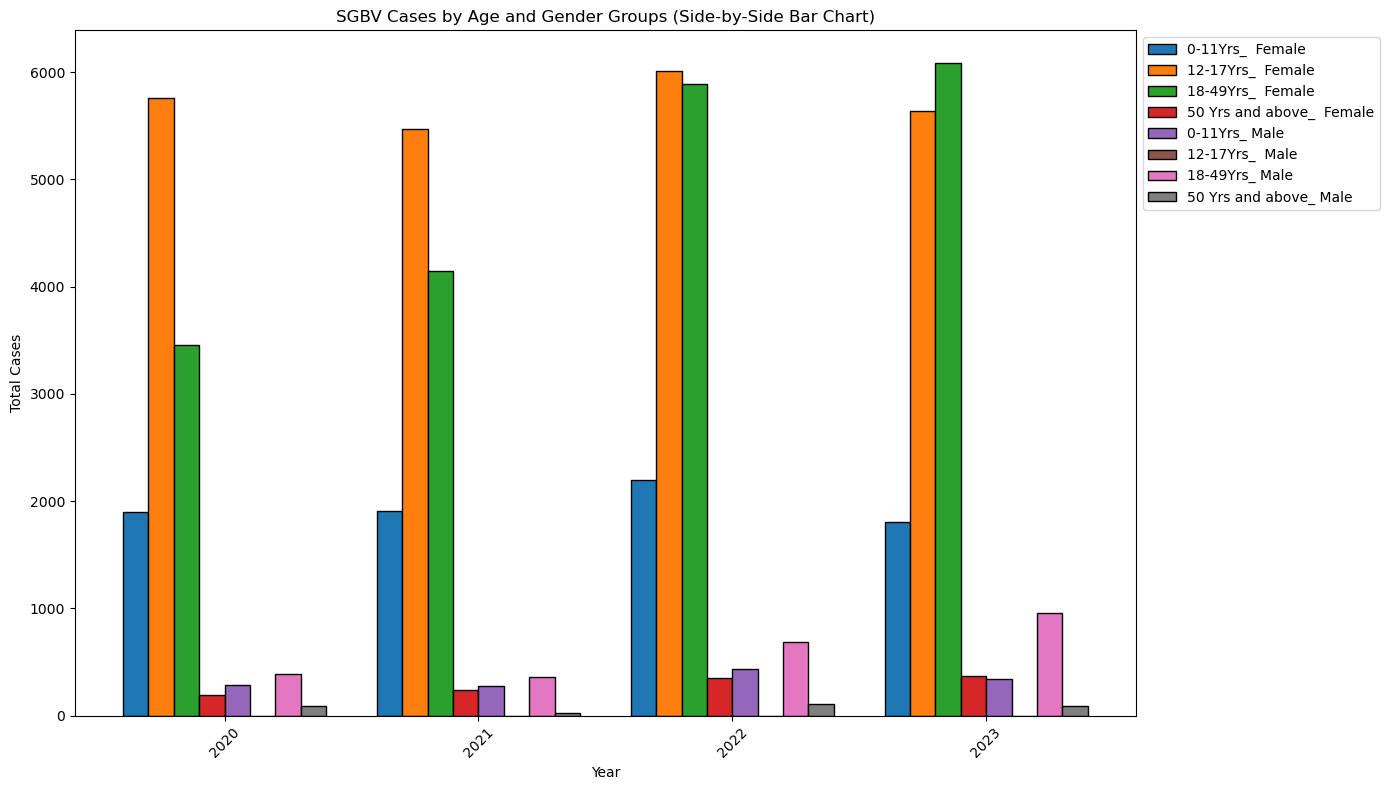

In [125]:
# Define the age-gender categories you want to plot
age_gender_columns = [
    '0-11Yrs_  Female', '12-17Yrs_  Female', '18-49Yrs_  Female', '50 Yrs and above_  Female',
    '0-11Yrs_ Male', '12-17Yrs_  Male', '18-49Yrs_ Male', '50 Yrs and above_ Male'
]

# Define years
years = ['2020', '2021', '2022', '2023']

# Initialize lists to hold data for each age-gender group
data_per_age_gender = {col: [] for col in age_gender_columns}

# Loop over each year and sum the data for each age-gender group
for year in years:
    for col in age_gender_columns:
        col_with_year = f"{col.strip()} {year}"  # Adjust column names to include the year
        if col_with_year in pivot_df.columns:
            data_per_age_gender[col].append(pivot_df[col_with_year].sum())
        else:
            data_per_age_gender[col].append(0)  # Fill with 0 if the column is missing

# Convert the data to a list of lists for plotting
data_for_plotting = [data_per_age_gender[col] for col in age_gender_columns]

# Number of categories and years
num_categories = len(age_gender_columns)
num_years = len(years)

# Define bar width and positions
bar_width = 0.8 / num_categories
indices = np.arange(num_years)  # The position of bars on the x-axis

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each age-gender group
for i, (col, data) in enumerate(zip(age_gender_columns, data_for_plotting)):
    ax.bar(indices + i * bar_width, data, bar_width, label=col, edgecolor='black')

# Set labels, title, and ticks
ax.set_xlabel('Year')
ax.set_ylabel('Total Cases')
ax.set_title('SGBV Cases by Age and Gender Groups (Side-by-Side Bar Chart)')
ax.set_xticks(indices + bar_width * (num_categories / 2 - 0.5))
ax.set_xticklabels(years, rotation=45)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df = df[df['COUNTY'] != 'Kenya']

### __SGBV CASES IN KENYA IN THE YEAR 2020__

In [140]:
df_head = pivot_df.head()

### __SGBV CASES IN KENYA IN THE YEAR 2021__

### __SGBV CASES IN KENYA IN THE YEAR 2022__

### __Using plotly express to create a horizontal bar chart for variance__. 

### __Generate a list high_var_cols with the column__ 


In [141]:
high_var_cols = trim_var.tail(5).index.to_list()

NameError: name 'trim_var' is not defined

In [ ]:
print("high_var_cols type:", type(high_var_cols))

In [ ]:
print("high_var_cols len:", len(trim_var))



In [ ]:
high_var_cols


### __Creating the feature matrix X__. 

In [ ]:
X = df[high_var_cols]

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

### __Build Model__


### __Iterate__


### __Creating a DataFrame X_summary with the mean and standard deviation for all the features in X__.

In [ ]:
X_summary = X.aggregate(["mean","std"]).astype(int)

print("X_summary type:", type(X_summary))
print("X_summary shape:", X_summary.shape)
X_summary


### __Create a StandardScaler transformer, use it to transform the data in X, and then put the transformed data into a DataFrame named X_scaled__.


In [ ]:
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns=X.columns)


In [ ]:
print("X_scaled type:", type(X_scaled))
print("X_scaled shape:", X_scaled.shape)
X_scaled.head()


### __Creating a DataFrame X_scaled_summary with the mean and standard deviation for all the features in X_scaled__.


In [ ]:
X_scaled_summary = X_scaled.aggregate(["mean","std"]).astype(int)

print("X_scaled_summary type:", type(X_scaled_summary))
print("X_scaled_summary shape:", X_scaled_summary.shape)
X_scaled_summary


In [ ]:
n_clusters = (2, 6)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # Build our model
    model = make_pipeline(StandardScaler(), KMeans(n_clusters = k,random_state = 42,n_init=10))
    # Train our model
    model.fit(X)
    # Calculate inertia
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    # calculate silhouette_scores
    silhouette_scores.append(
        silhouette_score(X,model.named_steps["kmeans"].labels_)
    )
    

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)




### __Using plotly express to create a line plot that shows the values of inertia_errors as a function of n_clusters__.

In [ ]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x=n_clusters, y=inertia_errors, title="K-Means Model: Inertia vs Number of Clusters"
)
fig.update_layout(xaxis_title="Number of Clusters (k)",yaxis_title = "Inertia")

fig.show()


### __Using plotly express to create a line plot that shows the values of silhouette_scores as a function of n_clusters__.

In [ ]:

# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
    x=n_clusters,
    y=silhouette_scores,
    title ="K-Means Model: Silhouette Score vs Number of Clusters"
    

)
fig.update_layout(xaxis_title="Number of Clusters", yaxis_title="silhouette Score")

fig.show()


### __Build and train a new k-means model named final_model__

In [ ]:
# Build model
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=1, random_state=42)
)


# Fit model to data
final_model.fit(X)



### Extracting the labels for final_model created during training and assign them to the variable labels.


In [ ]:
labels = final_model.named_steps["kmeans"].labels_

print("labels type:", type(labels))
print("labels len:", len(labels))
print(labels[:5])

### Create a DataFrame xgb

In [ ]:
xgb = X.groupby(labels).mean()

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb


#### Use plotly express to create a side-by-side bar chart from xgb that shows the mean of the features in X for each of the clusters in your final_model. 

In [ ]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode = "group",
    title= "Mean of sgbv cases in kenya  by Cluster"

)
fig.update_layout(xaxis_title="Years", yaxis_title = "Number of Cases")
fig.show()




### __Creating a PCA transformer, use it to reduce the dimensionality of the data in X to 2, and then put the transformed data into a DataFrame named X_pca__.

In [ ]:
# Instantiate transformer
pca = PCA(n_components=2,random_state =42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t,columns=["PC1", "PC2"])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()

In [ ]:
fig =px.scatter(
    data_frame = X_pca,
    x="PC1",
    y="PC2",
    color = labels.astype(str),
    title="PCA Representation of Clusters"
)

fig.update_layout(xaxis_title="PC1", yaxis_title = "PC2")

fig.show()

In [ ]:
df.head()

In [90]:
import pandas as pd

# Assuming df is your DataFrame
years = ['2020', '2021', '2022', '2023']
reshaped_data = []

for year in years:
    cols_male_0_11 = f'0-11YRS,MALE{year}'
    cols_female_0_11 = f'0-11YRS,FEMALE{year}'
    
    cols_male_12_17 = f'12-17YRS,MALE{year}'
    cols_female_12_17 = f'12-17YRS,FEMALE{year}'
    
    cols_male_18_49 = f'18-49YRS,MALE{year}'
    cols_female_18_49 = f'18-49YRS,FEMALE{year}'
    
    cols_male_50_above = f'50YRSANDABOVE,MALE{year}'
    cols_female_50_above = f'50YRSANDABOVE,FEMALE{year}'

    for _, row in df.iterrows():
        reshaped_data.append({
            'County': row['COUNTY'],
            'Year': year,
            'Age_Group': '0-11YRS',
            'Gender': 'MALE',
            'Count': row[cols_male_0_11]
        })
        reshaped_data.append({
            'County': row['COUNTY'],
            'Year': year,
            'Age_Group': '0-11YRS',
            'Gender': 'FEMALE',
            'Count': row[cols_female_0_11]
        })
        reshaped_data.append({
            'County': row['COUNTY'],
            'Year': year,
            'Age_Group': '12-17YRS',
            'Gender': 'MALE',
            'Count': row[cols_male_12_17]
        })
        reshaped_data.append({
            'County': row['COUNTY'],
            'Year': year,
            'Age_Group': '12-17YRS',
            'Gender': 'FEMALE',
            'Count': row[cols_female_12_17]
        })
        reshaped_data.append({
            'County': row['COUNTY'],
            'Year': year,
            'Age_Group': '18-49YRS',
            'Gender': 'MALE',
            'Count': row[cols_male_18_49]
        })
        reshaped_data.append({
            'County': row['COUNTY'],
            'Year': year,
            'Age_Group': '18-49YRS',
            'Gender': 'FEMALE',
            'Count': row[cols_female_18_49]
        })
        reshaped_data.append({
            'County': row['COUNTY'],
            'Year': year,
            'Age_Group': '50YRSANDABOVE',
            'Gender': 'MALE',
            'Count': row[cols_male_50_above]
        })
        reshaped_data.append({
            'County': row['COUNTY'],
            'Year': year,
            'Age_Group': '50YRSANDABOVE',
            'Gender': 'FEMALE',
            'Count': row[cols_female_50_above]
        })

# Create a new DataFrame from reshaped data
reshaped_df = pd.DataFrame(reshaped_data)

# Set appropriate data types if needed
reshaped_df['Count'] = pd.to_numeric(reshaped_df['Count'], errors='coerce')  # Ensure counts are numeric

# Display the reshaped DataFrame
print(reshaped_df.head())


     County  Year Age_Group  Gender  Count
0  Baringo   2020   0-11YRS    MALE    0.0
1  Baringo   2020   0-11YRS  FEMALE    0.0
2  Baringo   2020  12-17YRS    MALE    0.0
3  Baringo   2020  12-17YRS  FEMALE    1.0
4  Baringo   2020  18-49YRS    MALE    0.0


In [91]:
df_reshaped.head(4)

,0-11YRS_MALE,0-11YRS_FEMALE,12-17YRS_MALE,12-17YRS_FEMALE,18-49YRS_MALE,18-49YRS_FEMALE,50YRSANDABOVE_MALE,50YRSANDABOVE_FEMALE
Year,,,,,,,,
2020,100,120,150,130,200,180,90,110


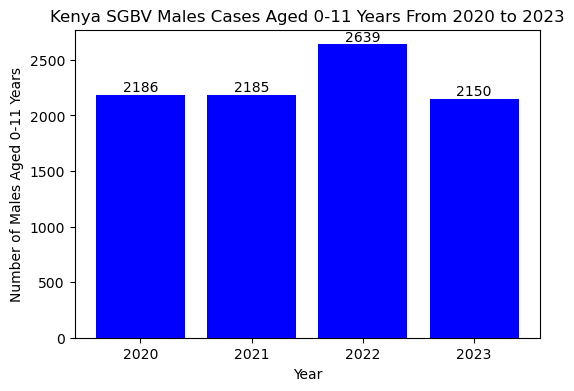

In [92]:
# Filter the data for males aged 0-11 years
male_0_11 = df_pivoted[('0-11YRS', 'MALE')].drop(columns=['0112020'], errors='ignore')
years = df_pivoted['Year']

# Create the bar plot with a smaller size
plt.figure(figsize=(6, 4))  # Smaller graph (6 inches wide, 4 inches tall)
bars = plt.bar(years, male_0_11, color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Males Aged 0-11 Years')
plt.title('Kenya SGBV Males Cases Aged 0-11 Years From 2020 to 2023')

# Add the actual numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    if not np.isnan(yval):  # Check if yval is not NaN
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Ddata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAj4AAAGHCAYAAACwH1iMAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAABjuElEQVR4nO3dZ1RU1/s+/GvoSBnpRRGxFzS2iBJrIvZujFG/2DXFXhI1JvbEkkRNYozxF8UUWzR2E5REJFHBirEbCwYLiEEYFJV6Py98OH9HQGd0Bhjm+qx11pJ99py59+wpt/vss49KRAREREREZsCiuAMgIiIiKipMfIiIiMhsMPEhIiIis8HEh4iIiMwGEx8iIiIyG0x8iIiIyGww8SEiIiKzwcSHiIiIzAYTHyIiIjIbpSrxWb16NVQqFY4ePapV/t9//6FRo0ZwdHREREREMUVnGOfOnUNoaCgqVaoEOzs7uLu7o0GDBhg1ahTS0tLy1d+5cye6desGX19f2NjYwMnJCfXr18eMGTMQHx+vVbdVq1ZQqVTKZm1tjYoVK2Lo0KH4999/AQB///03VCoVpkyZUmiMFy9ehEqlwpgxYwqts2/fPuV5Vq9eXWCdV199FSqVChUrVnz2C1OAQYMGPfdjX9SOHTvQpUsXeHl5wcbGBq6urnjttdewZs0aZGVlFUtMhtSgQQOoVCp89tlnxR0KWrVqhVatWulU9/fff0fTpk1RpkwZuLu7Y9CgQUhKStL5uZYsWYKePXsiICAAKpWq0Oe9fv06xo0bh5YtW6Js2bJPfZ8/LjU1FeXLl0dQUBBycnLy7d+/fz8sLS0xdepUnWMuLnnfxwVtkyZNKu7wCpWQkIAPP/wQTZs2hbu7O5ydndGwYUOsWLGiwD65d+8exo0bB19fX9jZ2aFevXpYv369Vp2cnBwsWrQI7du3R/ny5VGmTBnUrFkTU6ZMQWpqaoFxfPXVV6hRowZsbW0REBCAWbNm6fTdcfbsWcycORNXr159nuYX6tixYxg5ciTq1KkDJycneHl5oU2bNti7d2+B9a9cuYKePXuibNmycHR0REhICI4fP65VR5/X+sSJE+jUqRMqVKgAe3t7uLq6omnTpvjpp5/0b4yUImFhYQJAjhw5opRdu3ZNatSoIS4uLhIdHV2M0b2448ePi729vTRo0EDCwsIkMjJSNm7cKB9++KFUqVJF4uLilLo5OTkyYMAAASAdOnSQ1atXy759++S3336T2bNnS0BAgJQvX17r+C1btpRKlSpJdHS0REdHS1RUlHz99dfi6ekpfn5+kp6eLiIiDRs2FB8fH8nOzi4wzqlTpwoAOXHiRKFtiYyMFADi5OQkzZo1y7f/ypUrolKpxNnZWfz9/fV/sURk4MCBz/3Y55WbmyuDBg0SANKxY0f56aefJCoqSrZv3y7jx48XZ2dnWbJkSZHGZGixsbECQABIjRo1ijscadmypbRs2fKZ9fbt2ydWVlbSrVs32bNnj/z0009Srlw5CQwMlIcPH+r0XNWrV5cGDRrIkCFDxMPDo9DnjYyMFHd3d2nTpo307dtXAEhYWJhOz7F7924BIB9//LFWeXp6ulSpUkXq1KkjGRkZOh2rOOV9H4eFhSnfKXnbv//+W9zhFWrHjh3i5+cn06ZNk127dsmePXtk/PjxYmFhIYMHD85XPyQkRMqWLSvLly+XvXv3yrBhwwSArFmzRqlz9+5dcXJykhEjRsjGjRslMjJSPv/8c3FxcZFatWrJ/fv3tY45d+5cUalUMnXqVImMjJSFCxeKjY2NDB8+/Jnxb9y4UQBIZGTkC78Wj5s4caI0atRIFi1aJH/88Yds375dOnbsKADk+++/16qblJQkvr6+Urt2bfnll19k165d0qxZM3FycpLz588r9fR5rSMjI+Wtt96SH3/8Ufbu3Ss7duyQN998UwDInDlz9GpLqU58/vnnH6lQoYL4+PjIyZMnizm6FzdgwABxcHCQtLS0Avfn5uYq//7kk08EgMybN6/AullZWbJ06VKtspYtW0rt2rXz1V25cqUAkN27d4uIyLJlywSA7NixI1/d7OxsKVeunDRs2PCpbclLfPK+JP755x+t/R9++KGUL19eOnToYFKJz4IFCwSAzJo1q8D9CQkJ8tdffxVpTIY2cuRIASCdOnUSAHLgwIFijUfXxOfll1+WWrVqSVZWllJ24MABASDLli3T6blycnKUf9euXbvQ53283pEjR/RKfERE3nnnHbGxsdH63ho9erRYW1s/9T8UhnT//n2t7xR9FfQf0WfJzMzU6p/icOfOHcnMzMxXnve+j4+PV8p27dolAGTt2rVadUNCQsTX11f5z2F2drb8999/+Y6Zl6T8+OOPStl///0ndnZ2MmLECK26H3/8sahUKjlz5sxT4zdW4nPr1q18ZdnZ2VK3bl2pXLmyVvl7770n1tbWcvXqVaVMo9GIu7u7vPHGG0qZPq91YYKCgsTPz0+fpkipOtX1uBMnTqBZs2awsrLC/v37UadOHa39Fy9eRL9+/eDp6QlbW1vUrFkTX3/9tVadvNMx69atw7Rp0+Dr6wtnZ2e0adMGFy5cUOrNmTMHVlZWuHbtWr44hgwZAjc3Nzx8+BAAsGHDBrRt2xY+Pj6wt7dXhjvT09Of2abk5GQ4OzvD0dGxwP0qlQoAkJmZiYULFyIwMLDQU1JWVlYYOXLkM58TANRqNQDA2toaANCvXz/Y29sjLCwsX909e/bgxo0bGDJkiE7HDgkJgZ+fH1atWqWU5ebm4vvvv8fAgQNhYZH/Lfr111+jRYsW8PT0hIODA+rUqYOFCxfqNAwsIli2bBnq1asHe3t7uLi44PXXX8eVK1e06sXGxqJz587K+8PX1xedOnXC9evXCz12VlYWFixYgBo1auCjjz4qsI63tzeaNWum/D1r1iwEBQXB1dUVzs7OaNCgAVauXAl54t7Be/fuRatWreDm5gZ7e3tUqFABvXr1wv3795U6mZmZmDt3rjI87uHhgcGDB+P27dt6H6swDx8+xNq1a9GwYUMsXrwYALT67nHbtm1D3bp1YWtri0qVKuGLL77AzJkzlfdpHl37RESwcOFC+Pv7w87ODg0aNMBvv/32zJgB4MaNGzhy5AhCQ0NhZWWllAcHB6NatWrYsmWLTscp6P34IvUK8+mnn8LPzw8DBw5EVlYW/vzzTyxduhQzZ87ESy+9BODRd0nTpk3h4OAAR0dHtGvXDrGxsVrHOXr0KN58801UrFgR9vb2qFixIvr27aucus6Td1pqz549GDJkCDw8PFCmTBlkZGTg9u3bGDFiBPz8/JT31SuvvILff//9hdqY9/36448/YuLEiShXrhxsbW1x6dIlAI/eVy+99BLs7Ozg6uqKHj164Ny5c1rHGDRoEBwdHXH+/Hm0a9cODg4O8PHxwfz58wEAMTExaNasGRwcHFCtWjV8//33z4zLxcVF+a57XOPGjQFA6ztgy5YtcHR0RO/evbXqDh48GDdv3sShQ4cAAJaWlnBzcyv0mI//doSHh+Phw4cYPHhwvmOKCLZu3Vpo7KtXr1Ziad26dYHTCXR5XQvi6emZr8zS0hINGzbM99u3ZcsWvPrqq/D391fKnJ2d0bNnT+zYsQPZ2dkA9HutC+Pu7q71mdaJXmlSCZf3P4zFixeLWq2WwMBAuXnzZr56Z86cEbVaLXXq1JEffvhB9uzZIxMnThQLCwuZOXOmUi9vVKJixYrSv39/2bVrl6xbt04qVKggVatWVbL5W7duia2trUybNk3reZKTk8Xe3l7ee+89pWzOnDmyePFi2bVrl+zbt0+WL18uAQEB0rp162e2b+7cuQJA+vbtK/v27cs3PJon73+xU6dO1el1y5M34pOVlSVZWVmSnp4uhw4dkrp160qlSpW0Tgf873//E2tra0lKStI6Ru/evcXOzk5SUlKe+lx5r+3GjRvlo48+0vrf0W+//SYqlUouXboknTp1yjdqM378ePnmm28kPDxc9u7dK4sXLxZ3d/d8Q6MFjfgMHz5crK2tZeLEiRIeHi5r166VGjVqiJeXlyQmJoqIyL1798TNzU0aNWokP//8s0RFRcmGDRvk7bfflrNnzxbapoMHDwoAmTx58lPb/rhBgwbJypUrJSIiQiIiImTOnDlib2+vNWIUFxcndnZ2EhISIlu3bpV9+/bJmjVrJDQ0VHmdc3JypH379uLg4CCzZs2SiIgI+e6776RcuXJaQ+m6HOtp1qxZIwDk66+/FhGRZs2aiaOjo9y9e1er3m+//SYWFhbSqlUr2bJli2zcuFGCgoKkYsWK8uTXji59IiIyY8YMASBDhw6V3377TVasWCHlypUTb2/vZ474hIeHCwDZtWtXvn2vv/66+Pj4PLPtT3raiM/jnmfER0Rk//79YmFhIZMmTZJKlSpJUFCQ8hnJ+9//kCFDZOfOnbJ582Zp2rSpODg4aI0IbNy4UaZPny5btmyRqKgoWb9+vbRs2VI8PDzk9u3bSr28785y5crJiBEj5LfffpNNmzZJdna2tGvXTjw8PGTFihWyb98+2bp1q0yfPl3Wr1//1PjzjhkTE6N8p+RtIv/vO6BcuXLy+uuvy/bt22Xnzp2SnJysjFj37dtXdu3aJT/88INUqlRJ1Gq11ujwwIEDxcbGRmrWrClffPGFREREyODBg5Xvv2rVqsnKlStl9+7d0rlzZwEgR48e1asfHn8uKysrrZGbJk2ayMsvv5yv7unTpwWAfPvttzq9Rtu2bVPKpkyZIgDk3r17+eq7u7tL3759Cz1eUlKS8tp9/fXXyqnFvO9pXV9XXWVlZUmVKlWkfv36Stn9+/dFpVJp/e7lWbp0qQCQCxcuPPW4Bb3WeXJyciQrK0uSkpLk66+/FisrK1m+fLlecZfKxAeAqNXqfD/Kedq1ayfly5cXjUajVT5q1Cixs7OTO3fuiMj/+2B27NhRq97PP/8sALTmDA0cOFA8PT21zr0vWLBALCwstObePC43N1eysrIkKipKAMjff//91PY9fPhQunfvrrTR0tJS6tevL9OmTdNq6/r16wVAgW+Ggr6A8rRs2VI59uNbtWrV5Ny5c1p1816bRYsWKWXJyclia2sr/fv3f2o7Hn/8xo0blfk8O3fuFJFHyVOrVq1ERApMfB6X9yH44YcfxNLSUuk7kfyJT3R0tACQzz//XOsY165dE3t7e3n//fdFROTo0aMCQLZu3frMdjzuaa+7LvLaMnv2bHFzc1NOM2zatOmZc6bWrVsnAOSXX37RKs/70c07laPLsZ7m1Vdf1Ups8z5zK1eu1Kr38ssvi5+fn9bn4e7du+Lm5qaV+OjaJykpKWJnZyc9evTQqpeX5D8rAclL2Aqa5zdixAixsbF5ZtufZOzER0Tk/fffFwBib2+v/FjEx8eLlZWVjB49Wqvu3bt3xdvbW+tUwpOys7Pl3r174uDgIF988YVSntePAwYMyPcYR0dHGTdunN6xP/59/OSWlZWlfAe0aNFC63EpKSlib2+f73s3Pj5ebG1tpV+/fkrZwIED873vs7KyxMPDQwDI8ePHlfLk5GSxtLSUCRMm6N2W3bt3i4WFhYwfP16rvGrVqtKuXbt89W/evCkA5JNPPin0mNevXxcvLy9p1KiR1qnR4cOHi62tbYGPqVatmrRt2/apsRZ2qkuf11VX06ZNy/ddeePGjUKnWaxdu1YAyMGDBws9ZmGvdZ633npLeR/Z2NjofJr6caXyVFfXrl2h0Wgwbty4fDPDHz58iD/++AM9evRAmTJlkJ2drWwdO3bEw4cPERMTk+94j6tbty4AaA0Xjx07FklJSdi4cSOAR6drvvnmG3Tq1EnryqIrV66gX79+8Pb2hqWlJaytrdGyZUsAeOZwo62tLbZs2YKzZ89i8eLFePPNN3H79m18/PHHqFmzptbpt4KkpqbC2tpaa3vyCrjKlSvjyJEjOHLkCKKjo7F27VrY29vjtddew8WLF5V6LVu2ROXKlbVOd61ZswYZGRk6n+bKExAQgFatWmHVqlVITk7Gtm3bnnqM2NhYdO3aFW5ubsprOGDAAOTk5OCff/4p9HE7d+6ESqXC//73P61+9/b2xksvvYR9+/YBAKpUqQIXFxdMnjwZy5cvx9mzZ/Vqjz727t2LNm3aQK1WK22ZPn06kpOTlauN6tWrBxsbG4wYMQLff/99vlNAeW0rW7YsunTpotW2evXqwdvbW2mbLscqTFxcHCIjI5UrNQCgd+/ecHJy0jrdlZ6ejqNHj6J79+6wsbFRyh0dHdGlS5d8cevSJ9HR0Xj48CH69++v9fjg4GCt4fRnefI0W0Hlj8eRnZ2d77RjUZo9ezYA4H//+x+qVasGANi9ezeys7MxYMAArTjt7OzQsmVL5TUDHl1xNHnyZFSpUgVWVlawsrKCo6Mj0tPTC/y+6dWrV76yxo0bY/Xq1Zg7dy5iYmL0virxhx9+UL5T8rbHT008+ZzR0dF48OABBg0apFXu5+eHV199FX/88YdWuUqlQseOHZW/raysUKVKFfj4+KB+/fpKuaurKzw9PfOd5nuW48eP44033kCTJk0wb968fPsLe089bd+dO3fQsWNHiAg2bNiQ79To8xzzWfR9XZ/lu+++w8cff4yJEyeiW7duesVZ2L5nvdYA8MEHH+DIkSPYtWsXhgwZglGjRul9dWmpTHw++ugjTJ8+HWvXrsX//vc/reQnOTkZ2dnZ+Oqrr/IlAXkfnv/++0/reE+em7W1tQUAPHjwQCmrX78+mjdvrswT2rlzJ65evYpRo0Ypde7du4fmzZvj0KFDmDt3Lvbt24cjR45g8+bN+Y73NDVr1sS4cePw008/IT4+HosWLUJycrIyr6RChQoAkO8D7uTkpHzxzJgxo8Bj29nZoVGjRmjUqBGaNGmCvn374rfffkNCQgKmT5+u1FOpVBgyZAhOnTqlJE9hYWEICAhA69atdWrH44YOHYodO3Zg0aJFsLe3x+uvv15gvfj4eDRv3hw3btzAF198gb/++gtHjhxRXvenvYa3bt2CiMDLyytf38fExCj9rlarERUVhXr16uGDDz5A7dq14evrixkzZjz1Sz/vdY+Li9OpzYcPH0bbtm0BAP/3f/+HAwcO4MiRI5g2bZpWWypXrozff/8dnp6eGDlyJCpXrozKlSvjiy++0GpbamoqbGxs8rUtMTFRaZsuxyrMqlWrICJ4/fXXkZqaitTUVGRlZaFr1644cOAAzp8/DwBISUlRXucnPVmma58kJycDeDRH6kkFlT0p7zOcd5zH3blzB66ursrfT8ahy7wQY8n7rnk8gbx16xYA4OWXX84X64YNG7S+v/r164elS5di2LBh2L17Nw4fPowjR47Aw8OjwM+Kj49PvrINGzZg4MCB+O6779C0aVO4urpiwIABSExM1KkNNWvWVL5T8ranPWdeHxUUi6+vb74+LFOmDOzs7LTK8paQeJKNjY0y31IXsbGxCAkJQdWqVfHrr78q/ZHHzc2t0PcUgAJjSElJQUhICG7cuIGIiAhUqlQp3zEfPnxY4Jy7J9+r+tD3dX2asLAwvPXWWxgxYgQ+/fRTrX0uLi5QqVR6vy7Peq3zVKhQAY0aNULHjh3xzTffYMSIEZg6dWq+uYxPo+eMINMxa9YsqFQqzJo1C7m5uVizZg2srKzg4uICS0tLhIaGFjq5NyAg4Lmec8yYMejduzeOHz+OpUuXolq1aggJCVH27927Fzdv3sS+ffuUUR4Aha7joAuVSoXx48dj9uzZOH36NACgYcOGcHFxwY4dO/DJJ58odS0tLZUvnby6uvDx8YG7uzv+/vtvrfJBgwZh+vTpWLVqFaytrREbG4s5c+Y81/9IevbsiZEjR2L+/PkYPnw47O3tC6y3detWpKenY/PmzVr/0z9x4sQzn8Pd3R0qlQp//fVXgR+qx8vq1KmD9evXQ0Rw8uRJrF69GrNnz4a9vX2hE8YbNWoEV1dXbNu2DfPmzXvm67B+/XpYW1tj586dWl/cBU1ebN68OZo3b46cnBwcPXoUX331FcaNGwcvLy+8+eabcHd3h5ubG8LDwwt8LicnJ52PVZDc3FxlgmTPnj0LrLNq1SosXLhQ+eLL+4F+3JM/lrr2SV7iUtCPbWJi4jPXawoMDAQAnDp1Smt0IK8sbz8AHDlyRGv/834fGIu7uzsAYNOmTU8d7dJoNNi5cydmzJih9Z7NyMhQfoCeVNB71t3dHUuWLMGSJUsQHx+P7du3Y8qUKUhKSir0/aaPJ58zr68TEhLy1b1586bSfmOLjY1FmzZt4O/vjz179igXeTyuTp06WLduHbKzs7VGsU6dOgUAWu8r4FHS06ZNG8TFxeGPP/5Qzh48ecy8YwQFBSnlef+BefKYujLU6xoWFoZhw4Zh4MCBWL58eb7+s7e3R5UqVZTX4HGnTp2Cvb19vmRPl9e6MI0bN8by5ctx5coVeHh46PYgvU+OlWAFXT45a9YsASC9e/dW5rS0adNGXnrppWeuhfH4PJTHxcXFFXjOPjs7WypUqCCtWrUSlUqVb72W7du3FzjP4PXXX9dpDkBBE7VFHp1TtbCwkNdee00py5vENn/+/AIfU9BrVdjl7NeuXROVSlXgfIZOnTpJ2bJlZfjw4WJhYaHT5YciBb+2n3/+uXTr1k1r/smTc3y+/PJLASAJCQlKWW5urjRu3Djfee0n5/js379fAMiGDRt0ivFJZcuWld69ez+1zrMuZ79165bs379fREQmTJggjo6OWpdz3r9/XypUqCAACp0bJiKSmpoqAJQJhD/99JMykVRfTx6rIL/++qsAkJEjR0pkZGS+rXbt2uLl5aV8xnSd46Nrn9y5c+eF5viIiDRu3FgCAwO11p/Km2P0zTffPPPxTyqKOT4iorzueeLi4sTKykoWLFjw1MdpNJoC51rkTTAdOHCgUqbvpefdu3cXDw+Pp9Z51jEL+37Nm4vStWtXrfJr167lm0M4cOBAcXBwyHfswr7L/P39pVOnTk+NW+TRWlWurq5St27dAifY5sn7XDw50bt9+/ZaF2yIPHoPN2jQQMqWLfvU1zk5OVns7Ozk7bff1iqfN2+eTpez5/3O/Prrr1rl+ryuhQkLCxMLCwsZMGCA1rykJ73//vtiY2Oj9XuQlpYmHh4e0qdPH626ur7WhQkNDRULC4tC5/QWpNSO+OSZPn06LCws8NFHH0FEsG7dOnzxxRdo1qwZmjdvjnfeeQcVK1bE3bt3cenSJezYsaPQlSifxdLSEiNHjsTkyZPh4OCQ71xqcHAwXFxc8Pbbb2PGjBmwtrbGmjVr8o2kFGbEiBFITU1Fr169EBgYCEtLS5w/fx6LFy+GhYUFJk+erNSdPHkyzp8/jylTpuDPP/9Enz59ULFiRWRkZODKlSv47rvvYGlpiTJlymg9x4MHD5Q5Tjk5OYiLi8PChQsBAOPGjcsX09ChQ7Fr1y589913aNeuHfz8/PR4xbRNmDABEyZMeGqdkJAQ2NjYoG/fvnj//ffx8OFDfPPNN0hJSXnm8V955RWMGDECgwcPxtGjR9GiRQs4ODggISFBWfLgnXfewc6dO7Fs2TJ0794dlSpVgohg8+bNSE1N1RrBK8h7772Hc+fOYcaMGTh8+DD69esHPz8/aDQa/Pnnn1ixYgVmzZqFV155BZ06dcKiRYvQr18/jBgxAsnJyfjss8/yjXwsX74ce/fuVVYtffjwoTKnpk2bNgCAN998E2vWrEHHjh0xduxYNG7cGNbW1rh+/ToiIyPRrVs39OjRQ6djFWTlypWwsrLCBx98AF9f33z733rrLYwZMwa7du1Ct27dMHv2bHTq1Ant2rXD2LFjkZOTg08//RSOjo5aow269omLiwsmTZqEuXPnYtiwYejduzeuXbuGmTNn6nSqCwAWLFiAkJAQ9O7dG++++y6SkpIwZcoUBAYG5rt0uDBHjx5VVsRNS0uDiGDTpk0AHp16enwEJq88bx7V0aNHlaUoCjuVq4uKFSti9uzZmDZtGq5cuYL27dvDxcUFt27dwuHDh+Hg4IBZs2bB2dkZLVq0wKeffgp3d3dUrFgRUVFRWLlypTJH61k0Gg1at26Nfv36oUaNGsrp8vDw8EJH/l5U2bJl8dFHH+GDDz7AgAED0LdvXyQnJ2PWrFmws7Mr9DS9oVy4cEH5LHz88ce4ePGi1vzGypUrKyMLHTp0QEhICN555x2kpaWhSpUqWLduHcLDw/HTTz/B0tISwKPv1bzlBpYsWYLs7GytuaQeHh6oXLkygEengT788EN89NFHcHV1Rdu2bXHkyBHMnDkTw4YNQ61atZ4af96I0IoVK+Dk5AQ7OzsEBATAzc3thV7XjRs3YujQoahXrx7eeustHD58WGt//fr1le+uSZMm4ccff0SnTp0we/Zs2NraYv78+Xj48CFmzpz5XK/1iBEj4OzsjMaNG8PLywv//fcfNm7ciA0bNuC9997TfbQHKP0jPnk+/vhjASA9e/aUzMxMiYuLkyFDhki5cuXE2tpaPDw8JDg4WObOnas8Rt8RHxGRq1evCoB82XqegwcPStOmTaVMmTLi4eEhw4YNk+PHj+v0P8Ldu3fLkCFDpFatWqJWq8XKykp8fHykZ8+eha5KvX37dunSpYt4eXmJlZWVODk5Sb169WTixIlaK2iK5L+qy8LCQnx9faVDhw6yb9++Ao+fmZkpXl5eAkB+/vnnp8b/uMJe2ycVdFXXjh075KWXXhI7OzspV66cvPfee/Lbb789c8Qnz6pVqyQoKEgcHBzE3t5eKleuLAMGDFAucz1//rz07dtXKleuLPb29qJWq6Vx48ayevVqndu3bds26dSpk3h4eIiVlZW4uLhI69atZfny5VqjIKtWrZLq1auLra2tVKpUSebNm6csGJk34hMdHS09evQQf39/sbW1FTc3N2nZsqVs375d6zmzsrLks88+U14bR0dHqVGjhrz11lty8eJFvY71uNu3b4uNjY1079690Dp5/5vs0qWLUrZlyxapU6eO2NjYSIUKFWT+/PkyZswYcXFxyff4Z/WJyKORvXnz5omfn5/Y2NhI3bp1ZceOHTovYCgismfPHmnSpInY2dmJq6urDBgwoMCF2QqTdxVRQduTn9/C6un7tYsnRnzybN26VVq3bi3Ozs5ia2sr/v7+8vrrr8vvv/+u1Ll+/br06tVLXFxcxMnJSdq3by+nT58Wf39/nUZ8Hj58KG+//bbUrVtXnJ2dxd7eXqpXry4zZsxQVnIvzPOO+OT57rvvpG7dumJjYyNqtVq6deuWb7TDGCM+T7saraB+vnv3rowZM0a8vb2V9+W6deu06uT9ZhS2Pd4Xeb744gupVq2a8vmZMWNGgYv9FWTJkiUSEBAglpaW+WLW5XUtyNPe+49/X+W5dOmSdO/eXZydnaVMmTLy2muvybFjx7Tq6PNar1q1Spo3by7u7u5iZWUlZcuWlZYtW2ot/qgrlUgxXrJQCn311VcYM2YMTp8+jdq1axd3OEQlRlZWFurVq4dy5cphz549xR0OEZmpUn+qq6jExsYiLi4Os2fPRrdu3Zj0kNkbOnQoQkJC4OPjg8TERCxfvhznzp3T6QoyIiJjYeJjID169EBiYiKaN2+O5cuXF3c4RMXu7t27mDRpEm7fvg1ra2s0aNAAv/7661PnEhERGRtPdREREZHZKJULGBIREREVhIkPERERmQ0mPkRERGQ2OLlZR7m5ubh58yacnJye+yZxRERE5khEcPfuXfj6+ua7KWtRY+Kjo5s3b77QqsRERETm7tq1ayhfvnyxxsDER0d5N3m8du0anJ2dizkaIiIi05GWlgY/Pz+tGyYXFyY+Oso7veXs7MzEh4j0Mm/ePGzevBnnz5+Hvb09goODsWDBAlSvXl2r3rlz5zB58mRERUUhNzcXtWvXxs8//4wKFSoAeHRPtN9//x03b96Eo6OjcpwaNWooxzh+/DgmT56MI0eOwNLSEr169cKiRYuU+4QRFaeSMFWEk5uJiIwsKioKI0eORExMDCIiIpCdnY22bdsiPT1dqXP58mU0a9YMNWrUwL59+/D333/jo48+gp2dnVKnYcOGCAsLw7lz57B7926ICNq2bYucnBwAj07Jt2nTBlWqVMGhQ4cQHh6OM2fO5LthMpE54wKGOkpLS4NarYZGo+GIDxG9kNu3b8PT0xNRUVFo0aIFAODNN9+EtbU1fvzxR52Pc/LkSbz00ku4dOkSKleujBUrVuCjjz5CQkKCMoH0xIkTqF+/Pi5evIgqVaoYpT1Ez1KSfkM54kNEVMQ0Gg0AwNXVFcCjq0Z37dqFatWqoV27dvD09ERQUBC2bt1a6DHS09MRFhaGgIAA5cKLjIwM2NjYaF01Y29vDwDYv3+/kVpDZFqY+BARFSERwYQJE9CsWTMEBgYCAJKSknDv3j3Mnz8f7du3x549e9CjRw/07NkTUVFRWo9ftmwZHB0d4ejoiPDwcERERMDGxgYA8OqrryIxMRGffvopMjMzkZKSgg8++AAAkJCQULQNJSqhmPgQERWhUaNG4eTJk1i3bp1SlpubCwDo1q0bxo8fj3r16mHKlCno3Llzvpse9+/fH7GxsYiKikLVqlXxxhtv4OHDhwCA2rVr4/vvv8fnn3+OMmXKwNvbG5UqVYKXlxcsLS2LrpFEJRgTHyKiIjJ69Ghs374dkZGRWmuZuLu7w8rKCrVq1dKqX7NmTcTHx2uVqdVqVK1aFS1atMCmTZtw/vx5bNmyRdnfr18/JCYm4saNG0hOTsbMmTNx+/ZtBAQEGLdxRCaCl7MTERmZiGD06NHYsmUL9u3bly8JsbGxwcsvv4wLFy5olf/zzz/w9/d/5rEzMjLylXt5eQEAVq1aBTs7O4SEhLxgK4hKByY+RERGNnLkSKxduxbbtm2Dk5MTEhMTATwavcmbfPzee++hT58+aNGiBVq3bo3w8HDs2LED+/btAwBcuXIFGzZsQNu2beHh4YEbN25gwYIFsLe3R8eOHZXnWrp0KYKDg+Ho6IiIiAi89957mD9/PsqWLVvUzSYqkXg5u45K0qV4RGRaClu0LSwsTGuNnVWrVmHevHm4fv06qlevjlmzZqFbt24AHq3RM2zYMBw7dgwpKSnw8vJCixYtMH36dK2FEAcMGIBdu3bh3r17qFGjBiZNmoTQ0FCjto/oWUrSbygTHx2VpE4jIiIyJSXpN5STm4mIiMhscI4PEZmdEnC7oFKP5xKopOKIDxEREZkNJj5ERERkNpj4EBERkdlg4kNERERmg4kPERERmQ0mPkRERGQ2mPgQERGR2WDiQ0RERGaDiQ8RERGZDSY+REREZDaY+BAREZHZKNbEZ968eXj55Zfh5OQET09PdO/eHRcuXNCqM2jQIKhUKq2tSZMmWnUyMjIwevRouLu7w8HBAV27dsX169e16qSkpCA0NBRqtRpqtRqhoaFITU01dhOJiIioBCnWxCcqKgojR45ETEwMIiIikJ2djbZt2yI9PV2rXvv27ZGQkKBsv/76q9b+cePGYcuWLVi/fj3279+Pe/fuoXPnzsjJyVHq9OvXDydOnEB4eDjCw8Nx4sQJhIaGFkk7iYiIqGRQiZSce+jevn0bnp6eiIqKQosWLQA8GvFJTU3F1q1bC3yMRqOBh4cHfvzxR/Tp0wcAcPPmTfj5+eHXX39Fu3btcO7cOdSqVQsxMTEICgoCAMTExKBp06Y4f/48qlev/szY0tLSoFarodFo4OzsbJgGE1Gx4N3Zja/k/LJQSVCSfkNL1BwfjUYDAHB1ddUq37dvHzw9PVGtWjUMHz4cSUlJyr5jx44hKysLbdu2Vcp8fX0RGBiIgwcPAgCio6OhVquVpAcAmjRpArVardR5UkZGBtLS0rQ2IiIiMm0lJvEREUyYMAHNmjVDYGCgUt6hQwesWbMGe/fuxeeff44jR47g1VdfRUZGBgAgMTERNjY2cHFx0Tqel5cXEhMTlTqenp75ntPT01Op86R58+Yp84HUajX8/PwM1VQiIiIqJlbFHUCeUaNG4eTJk9i/f79Wed7pKwAIDAxEo0aN4O/vj127dqFnz56FHk9EoHpsPFtVwNj2k3UeN3XqVEyYMEH5Oy0tjckPERGRiSsRIz6jR4/G9u3bERkZifLlyz+1ro+PD/z9/XHx4kUAgLe3NzIzM5GSkqJVLykpCV5eXkqdW7du5TvW7du3lTpPsrW1hbOzs9ZGREREpq1YEx8RwahRo7B582bs3bsXAQEBz3xMcnIyrl27Bh8fHwBAw4YNYW1tjYiICKVOQkICTp8+jeDgYABA06ZNodFocPjwYaXOoUOHoNFolDpERERU+hXrVV3vvvsu1q5di23btmldWaVWq2Fvb4979+5h5syZ6NWrF3x8fHD16lV88MEHiI+Px7lz5+Dk5AQAeOedd7Bz506sXr0arq6umDRpEpKTk3Hs2DFYWloCeDRX6ObNm/j2228BACNGjIC/vz927NihU6wlaUY6Eb0YXtVlfLyqix5Xkn5DizXxKWx+TVhYGAYNGoQHDx6ge/fuiI2NRWpqKnx8fNC6dWvMmTNHa77Nw4cP8d5772Ht2rV48OABXnvtNSxbtkyrzp07dzBmzBhs374dANC1a1csXboUZcuW1SnWktRpRPRimPgYHxMfelxJ+g0tUev4lGQlqdOI6MUw8TE+/rLQ40rSb2iJmNxMREREVBReOPFJS0vD1q1bce7cOUPEQ0RERGQ0eic+b7zxBpYuXQoAePDgARo1aoQ33ngDdevWxS+//GLwAImIiIgMRe/E588//0Tz5s0BAFu2bIGIIDU1FV9++SXmzp1r8ACJiIiIDEXvxEej0Sj30goPD0evXr1QpkwZdOrUSVlUkIiIiKgk0jvx8fPzQ3R0NNLT0xEeHq7cHDQlJQV2dnYGD5CIiIjIUPS+V9e4cePQv39/ODo6wt/fH61atQLw6BRYnTp1DB0fERERkcHonfi8++67CAoKQnx8PEJCQmBh8WjQqFKlSpzjQ0RERCWaXqe6srKyUKlSJdjb26NHjx5wdHRU9nXq1AmvvPKKwQMkIiIiMhS9Eh9ra2tkZGQUeqsJIiIiopJM78nNo0ePxoIFC5CdnW2MeIiIiIiMRu85PocOHcIff/yBPXv2oE6dOnBwcNDav3nzZoMFR0RERGRIeic+ZcuWRa9evYwRCxEREZFR6Z34hIWFGSMOIiIiIqPj3dmJiIjIbDxX4rNp0ya88cYbaNKkCRo0aKC1Uck2b948vPzyy3BycoKnpye6d++OCxcuaNXZvHkz2rVrB3d3d6hUKpw4cSLfcRITExEaGgpvb284ODigQYMG2LRpU756u3btQlBQEOzt7eHu7o6ePXsaq2mlXlH2XcWKFaFSqbS2KVOmGLN5RERFQu/E58svv8TgwYPh6emJ2NhYNG7cGG5ubrhy5Qo6dOhgjBjJgKKiojBy5EjExMQgIiIC2dnZaNu2LdLT05U66enpeOWVVzB//vxCjxMaGooLFy5g+/btOHXqFHr27Ik+ffogNjZWqfPLL78gNDQUgwcPxt9//40DBw6gX79+Rm1faVaUfQcAs2fPRkJCgrJ9+OGHRmsbEVGRET1Vr15d1q5dKyIijo6OcvnyZRER+eijj2TkyJH6Hs5kaDQaASAajaa4QzGopKQkASBRUVH59sXFxQkAiY2NzbfPwcFBfvjhB60yV1dX+e6770REJCsrS8qVK6f8TYZnrL4TEfH395fFixcbOuQSA+Bm7I3ocSXpN1TvEZ/4+HgEBwcDAOzt7XH37l0Aj/4XuW7dOkPlY1RENBoNAMDV1VWvxzVr1gwbNmzAnTt3kJubi/Xr1yMjI0O5d9vx48dx48YNWFhYoH79+vDx8UGHDh1w5swZQzfBbBmr7/IsWLAAbm5uqFevHj7++GNkZmYaKnQiomKjd+Lj7e2N5ORkAIC/vz9iYmIAAHFxcRARw0ZHRiUimDBhApo1a4bAwEC9HrthwwZkZ2fDzc0Ntra2eOutt7BlyxZUrlwZAHDlyhUAwMyZM/Hhhx9i586dcHFxQcuWLXHnzh2Dt8XcGLPvAGDs2LFYv349IiMjMWrUKCxZsgTvvvuuoZtBVOIZam5dq1at8s2be/PNN7XqpKSkIDQ0FGq1Gmq1GqGhoUhNTTVi68yT3onPq6++ih07dgAAhg4divHjxyMkJAR9+vRBjx49DB4gGc+oUaNw8uTJ5xqp+/DDD5GSkoLff/8dR48exYQJE9C7d2+cOnUKAJCbmwsAmDZtGnr16oWGDRsiLCwMKpUKGzduNGg7zJEx+w4Axo8fj5YtW6Ju3boYNmwYli9fjpUrVyr/6SEyF4aaWwcAw4cP15o39+2332rt79evH06cOIHw8HCEh4fjxIkTCA0NNUq7zJq+58ZycnIkKytL+XvDhg0yevRo+eKLLyQjI8NwJ+FKmJJ0ftIQRo0aJeXLl5crV64UWqeweSKXLl0SAHL69Gmt8tdee03eeustERHZu3evAJC//vpLq07jxo3lgw8+MEwjzJSx+64g169fFwASExPzQrGXFMU9/8UcttLqeefWtWzZUsaOHVvocc+ePZvvMxYdHS0A5Pz584YIvViVpN9QvUd8LCwsYGX1/9Y9fOONN/Dll19izJgxsLGxeeFEjIxLRDBq1Chs3rwZe/fuRUBAgN7HuH//PoBH74XHWVpaKiM9DRs2hK2trdaQcFZWFq5evQp/f/8XaIH5Kqq+K0jeFV8+Pj56PydRafK8c+sAYM2aNXB3d0ft2rUxadIkZY4sAERHR0OtViMoKEgpa9KkCdRqNQ4ePPjigZNC75WbAeCvv/7Ct99+i8uXL2PTpk0oV64cfvzxRwQEBKBZs2aGjpEMaOTIkVi7di22bdsGJycnJCYmAgDUajXs7e0BAHfu3EF8fDxu3rwJAEry4u3tDW9vb9SoUQNVqlTBW2+9hc8++wxubm7YunUrIiIisHPnTgCAs7Mz3n77bcyYMQN+fn7w9/fHp59+CgDo3bt3UTe7VCiqvouOjkZMTAxat24NtVqNI0eOYPz48ejatSsqVKhQDC0nKhnkBebW9e/fHwEBAfD29sbp06cxdepU/P3334iIiADwaH0tT0/PfI/z9PRUPutkIPoOEW3atEns7e1l2LBhYmtrq1zO/vXXX0uHDh0MOx5VgpSkYboXAaDALSwsTKkTFhZWYJ0ZM2Yodf755x/p2bOneHp6SpkyZaRu3br5LpHOzMyUiRMniqenpzg5OUmbNm3ynWIh3RVV3x07dkyCgoJErVaLnZ2dVK9eXWbMmCHp6elF2FrjKu7TQOawlUbvvvuu+Pv7y7Vr1wrc/7RTXU86evSoAJBjx46JiMjHH38s1apVy1evSpUqMm/evBeKuyQoSb+her8969WrJ99//72IaK/jExsbK15eXoaNrgQpSZ1GRC+muJMCc9hKmxeZW1eQ3Nxcsba2lvXr14uIyMqVK0WtVuerp1arZdWqVc8bdolRkn5D9Z7jc+HCBbRo0SJfubOzMy+7IyKiUkXkxefWFeTMmTPIyspS5s01bdoUGo0Ghw8fVuocOnQIGo1GWTuPDEPvOT4+Pj64dOkSKlasqFW+f/9+VKpUyVBxERERFTtDzK27fPky1qxZg44dO8Ld3R1nz57FxIkTUb9+fbzyyisAgJo1a6J9+/YYPny4cpn7iBEj0LlzZ1SvXr2om1266TtEtGDBAqlVq5bExMSIk5OT/PXXX/LTTz+Jh4eHfPXVV0YYlCoZjDVMV9zD0eawGUtxt8scNvad6W6lBfDic+vi4+OlRYsW4urqKjY2NlK5cmUZM2aMJCcnaz1XcnKy9O/fX5ycnMTJyUn69+8vKSkpRddYIypJp7pUIiK6JEgTJ07E/PnzYW1tjWnTpmHx4sV4+PAhAMDW1haTJk3CnDlzDJ2XlRhpaWlQq9XQaDRwdnY22HFVKoMdigqh2ztcf+w742PfmS5j9R2ZJmP9hj4PnROfSpUqwd7eHj/99BPq16+P+/fv4+zZs8jNzUWtWrXg6Oho7FiLFRMf08UfT9PFvjNdTHzocSUp8dF5cvPp06fRqlUrNG3aFHPmzIGdnR0aNWqExo0bl/qkh4iIiEoHnUd88kRGRmLo0KHw8PDAlClTYGlpqbW/a9euBg2wpOCIj+niqIHpYt+ZLmOO+LD/jM/Q/VeSRnz0TnwAYNu2bejVq1e+Je5VKhVycnIMFlxJwsTHdPHH03Sx70wXEx/TVpoTH73W8Xnw4AHGjBmDPn364KOPPkJmZiZyc3OVrbQmPURERFQ66LyOz8GDBzFw4EDY2triwIEDaNiwoTHjIiIiIjI4nUd8WrVqhW7duuHYsWNMeoiIiMgk6Tzi8/vvvxd4qwoiIiIiU6HziA+THiIiIjJ1et+klIiIiMhUMfEhIiIis8HEh4iIiMwGEx8iIiIyGwZLfM6dO4dKlSoZ6nBEREREBmewxCczMxP//vuvoQ5HREREZHA6r+MzYcKEp+6/ffu23k8+b948bN68GefPn4e9vT2Cg4OxYMECVK9eXakjIpg1axZWrFiBlJQUBAUF4euvv0bt2rWVOhkZGZg0aRLWrVuHBw8e4LXXXsOyZctQvnx5pU5KSgrGjBmD7du3A3h0M9WvvvoKZcuW1TtuIiIiMk0636TU0tIS9erVK/TmYvfu3cPx48f1ul9X+/bt8eabb+Lll19GdnY2pk2bhlOnTuHs2bNwcHAAACxYsAAff/wxVq9ejWrVqmHu3Ln4888/ceHCBTg5OQEA3nnnHezYsQOrV6+Gm5sbJk6ciDt37uDYsWPK3eM7dOiA69evY8WKFQCAESNGoGLFitixY4dOsfImpaaLN7o0Xew708WblJq20nyTUoiOqlevLj/++GOh+2NjY8XCwkLXwxUoKSlJAEhUVJSIiOTm5oq3t7fMnz9fqfPw4UNRq9WyfPlyERFJTU0Va2trWb9+vVLnxo0bYmFhIeHh4SIicvbsWQEgMTExSp3o6GgBIOfPny8wlocPH4pGo1G2a9euCQDRaDQv1MYnPXp7cTPmZizF3S5z2Nh3prsZU3G3zRw2Q9NoNGKM39DnofMcn4YNG+LYsWOF7lepVBCRF0rCNBoNAMDV1RUAEBcXh8TERLRt21apY2tri5YtW+LgwYMAgGPHjiErK0urjq+vLwIDA5U60dHRUKvVCAoKUuo0adIEarVaqfOkefPmQa1WK5ufn98LtY2IiIiKn85zfD7//HNkZGQUuv+ll15Cbm7ucwciIpgwYQKaNWuGwMBAAEBiYiIAwMvLS6uul5eXMpE6MTERNjY2cHFxyVcn7/GJiYnw9PTM95yenp5KnSdNnTpVa15TWloakx8iIiITp3Pi4+3tbcw4MGrUKJw8eRL79+/Pt0/1xAldEclX9qQn6xRU/2nHsbW1ha2trS6hExERkYkoEQsYjh49Gtu3b0dkZKTWlVh5ydaTozJJSUnKKJC3tzcyMzORkpLy1Dq3bt3K97y3b9/ON5pEREREpZfBEp+///5buYJKVyKCUaNGYfPmzdi7dy8CAgK09gcEBMDb2xsRERFKWWZmJqKiohAcHAzg0dwja2trrToJCQk4ffq0Uqdp06bQaDQ4fPiwUufQoUPQaDRKHSIiIir9dD7VpQt9JzePHDkSa9euxbZt2+Dk5KSM7KjVatjb20OlUmHcuHH45JNPULVqVVStWhWffPIJypQpg379+il1hw4diokTJ8LNzQ2urq6YNGkS6tSpgzZt2gAAatasifbt22P48OH49ttvATy6nL1z585aawYRERFR6aZz4tOzZ8+n7tdoNM+cd/Okb775BgDQqlUrrfKwsDAMGjQIAPD+++/jwYMHePfdd5UFDPfs2aOs4QMAixcvhpWVFd544w1lAcPVq1drjUCtWbMGY8aMUa7+6tq1K5YuXapXvERERGTadF7A0NraGiEhIYXOiblz5w527typ1wKGpoQLGJquF1xloVDsO+Nj35kuY/UdwP4rCobuv5K0gKHOIz41a9ZEr169MHTo0AL3nzhxAjt37jRYYERERESGptcChsePHy90v62tLSpUqGCQoIiIiIiMQedTXRkZGcjJyUGZMmWMHVOJxFNdpounS0wX+8508VSXaeOpLoCL+REREZHJe6F1fDp16oSEhARDxUJERERkVC+U+Pz555948OCBoWIhIiIiMqoSccsKIiIioqLwQomPv78/rK2tDRULERERkVG90C0rTp8+bag4iIiIiIxO78Tn4sWLOHjwIBITE6FSqeDl5YXg4GBUrVrVGPERERERGYzOiY9Go8GAAQOwY8cOqNVqeHp6QkRw+/ZtpKWloUuXLvjhhx+K/fp8IiIiosLoPMdn9OjRiIuLQ3R0NFJSUnDhwgX8888/SElJwcGDBxEXF4fRo0cbM1YiIiKiF6Lzys1ly5bF7t27ERQUVOD+mJgYtG/fHqmpqYaMr8Tgys2mi6v/mi72neniys2mrTSv3KzXVV2qp7zbnraPiIiIqCTQOfHp0qULhg8fjqNHj+bbd/ToUbz99tvo2rWrQYMjIiIiMiSdE5+vvvoKvr6+aNy4MVxdXVGjRg3UrFkTrq6uCAoKgo+PD7788ktjxkpERET0QnS+qqts2bL47bffcP78eURHRyMxMREA4O3tjaZNm6JGjRpGC5KIiIjIEPRex6dGjRpMcoiIiMgk8V5dREREZDaY+BAREZHZYOJDREREZoOJDxEREZkNJj5ERERkNnS6qsvFxUXnlZnv3LnzQgERERERGYtOic+SJUuUfycnJ2Pu3Llo164dmjZtCgCIjo7G7t278dFHHxklSCIiIiJD0PkmpXl69eqF1q1bY9SoUVrlS5cuxe+//46tW7caMr4SgzcpNV280aXpYt+ZLt6k1LTxJqWP2b17N9q3b5+vvF27dvj9998NEhQRERGRMeid+Li5uWHLli35yrdu3Qo3NzeDBEVERERkDHrfsmLWrFkYOnQo9u3bp8zxiYmJQXh4OL777juDB0hERERkKHonPoMGDULNmjXx5ZdfYvPmzRAR1KpVCwcOHEBQUJAxYiQiIiIyCL0nN5srTm42XZwga7rYd6aLk5tNGyc3P+Hy5cv48MMP0a9fPyQlJQEAwsPDcebMGYMGR0RERGRIeic+UVFRqFOnDg4dOoRffvkF9+7dAwCcPHkSM2bMMHiARERERIaid+IzZcoUzJ07FxEREbCxsVHKW7dujejoaIMGR0RERGRIeic+p06dQo8ePfKVe3h4IDk52SBBERERERmD3olP2bJlkZCQkK88NjYW5cqVM0hQRERERMagd+LTr18/TJ48GYmJiVCpVMjNzcWBAwcwadIkDBgwwBgxEhERERmE3onPxx9/jAoVKqBcuXK4d+8eatWqhRYtWiA4OBgffvihMWIkIiIiMojnXsfn8uXLiI2NRW5uLurXr4+qVasaOrYShev4mC6uBWO62Hemi+v4mLbSvI6P3is356lcuTIqV65syFiIiIiIjErvxGfChAkFlqtUKtjZ2aFKlSro1q0bXF1dXzg4IiIiIkPS+1RX69atcfz4ceTk5KB69eoQEVy8eBGWlpaoUaMGLly4AJVKhf3796NWrVrGirvI8VSX6eLpEtPFvjNdPNVl2krzqS69Jzd369YNbdq0wc2bN3Hs2DEcP34cN27cQEhICPr27YsbN26gRYsWGD9+vDHiJSIiInpueo/4lCtXDhEREflGc86cOYO2bdvixo0bOH78ONq2bYv//vvPoMEWJ474mC6OGpgu9p3p4oiPaeOIz2M0Go1yY9LH3b59G2lpaQAeLXKYmZn5zGP9+eef6NKlC3x9faFSqbB161at/YMGDYJKpdLamjRpolUnIyMDo0ePhru7OxwcHNC1a1dcv35dq05KSgpCQ0OhVquhVqsRGhqK1NRU/RpOREREJu+5TnUNGTIEW7ZswfXr13Hjxg1s2bIFQ4cORffu3QEAhw8fRrVq1Z55rPT0dLz00ktYunRpoXXat2+PhIQEZfv111+19o8bNw5btmzB+vXrsX//fty7dw+dO3dGTk6OUqdfv344ceIEwsPDER4ejhMnTiA0NFTfphMREZGpEz3dvXtXhg0bJjY2NmJhYSEWFhZiY2Mjw4cPl7t374qISGxsrMTGxup1XACyZcsWrbKBAwdKt27dCn1MamqqWFtby/r165WyGzduiIWFhYSHh4uIyNmzZwWAxMTEKHWio6MFgJw/f17n+DQajQAQjUaj82N08WhAkZsxN2Mp7naZw8a+M93NmIq7beawGZqxfkOfh94jPo6Ojvi///s/JCcnIzY2FsePH0dycjJWrFgBR0dHAEC9evVQr149gyRm+/btg6enJ6pVq4bhw4drnWY7duwYsrKy0LZtW6XM19cXgYGBOHjwIAAgOjoaarUaQUFBSp0mTZpArVYrdQqSkZGBtLQ0rY2IiIhMm96JTx5HR0fUrVsXL730EsqUKYMdO3Yop7oMpUOHDlizZg327t2Lzz//HEeOHMGrr76KjIwMAEBiYiJsbGzg4uKi9TgvLy8kJiYqdTw9PfMd29PTU6lTkHnz5ilzgtRqNfz8/AzYMiIiIioOz534AMDFixcxdepUlC9fHm+88YahYlL06dMHnTp1QmBgILp06YLffvsN//zzD3bt2vXUx4kIVI9N+1cVcAnAk3WeNHXqVGg0GmW7du3a8zeEiIiISgS9V25+8OABfv75Z6xcuRIxMTHIycnB4sWLMWTIEOVUl7H4+PjA398fFy9eBAB4e3sjMzMTKSkpWqM+SUlJCA4OVurcunUr37Fu374NLy+vQp/L1tYWtra2Bm4BERERFSedR3wOHz6MESNGwNvbG0uXLkWvXr1w7do1WFhYoE2bNkZPegAgOTkZ165dg4+PDwCgYcOGsLa2RkREhFInISEBp0+fVhKfpk2bQqPR4PDhw0qdQ4cOQaPRKHWIiIjIPOg84hMcHIzRo0fj8OHDqF69ukGe/N69e7h06ZLyd1xcHE6cOAFXV1e4urpi5syZ6NWrF3x8fHD16lV88MEHcHd3R48ePQAAarUaQ4cOxcSJE+Hm5gZXV1dMmjQJderUQZs2bQAANWvWRPv27TF8+HB8++23AIARI0agc+fOBmsHERERmQhdL/8KCQkRJycn6devn/z222+Sm5srIiJWVlZy5syZ57qkLDIyUgDk2wYOHCj379+Xtm3bioeHh1hbW0uFChVk4MCBEh8fr3WMBw8eyKhRo8TV1VXs7e2lc+fO+eokJydL//79xcnJSZycnKR///6SkpKiV6y8nN10N2Mp7naZw8a+M93NmIq7beawGVpJupxdr1tWXLt2DWFhYQgLC8ODBw/Qp08fLFu2DCdPnkTNmjWNkpiVFLxlhenS/R2uH/ad8bHvTJex+g5g/xUFQ/efyd6yws/PD9OnT0dcXBx+/PFHJCUlwcrKCt26dcMHH3yA48ePGytOIiIiohem901Kn5SSkoKffvoJq1atwsmTJ7VuFVGacMTHdHHUwHSx70wXR3xMW2ke8XnhxOdxx48fR4MGDQx1uBKFiY/p4o+n6WLfmS4mPqatNCc+L7SA4ZNKa9JDREREpYNBEx8iIiKikoyJDxEREZkNJj5ERERkNvROfB48eID79+8rf//7779YsmQJ9uzZY9DAiIiIiAxN78SnW7du+OGHHwAAqampCAoKwueff45u3brhm2++MXiARERERIaid+Jz/PhxNG/eHACwadMmeHl54d9//8UPP/yAL7/80uABEhERERmK3onP/fv34eTkBADYs2cPevbsCQsLCzRp0gT//vuvwQMkIiIiMhS9E58qVapg69atuHbtGnbv3o22bdsCAJKSkop9USIiIiKip9E78Zk+fTomTZqEihUronHjxmjatCmAR6M/9evXN3iARERERIbyXLesSExMREJCAl566SVYWDzKnQ4fPgxnZ2fUqFHD4EGWBLxlhenibQ9MF/vOdPGWFaaNt6x4gre3N5ycnBAREYEHDx4AAF5++eVSm/QQERFR6aB34pOcnIzXXnsN1apVQ8eOHZGQkAAAGDZsGCZOnGjwAImIiIgMRe/EZ/z48bC2tkZ8fDzKlCmjlPfp0wfh4eEGDY6IiIjIkKz0fcCePXuwe/dulC9fXqu8atWqvJydiIiISjS9R3zS09O1Rnry/Pfff7C1tTVIUERERETGoHfi06JFC+WWFQCgUqmQm5uLTz/9FK1btzZocERERESGpPeprk8//RStWrXC0aNHkZmZiffffx9nzpzBnTt3cODAAWPESERERGQQeo/41KpVCydPnkTjxo0REhKC9PR09OzZE7GxsahcubIxYiQiIiIyiOdawNAccQFD08VF8EwX+850cQFD01aaFzDU6VTXyZMndT5g3bp1nzsYIiIiImPSKfGpV68eVCoVnjU4pFKpkJOTY5DAiIiIiAxNp8QnLi7O2HEQERERGZ1OiY+/v7+x4yAiIiIyOr0vZ89z9uxZxMfHIzMzU6u8a9euLxwUERERkTHonfhcuXIFPXr0wKlTp7Tm/aj+/2n2nONDREREJZXe6/iMHTsWAQEBuHXrFsqUKYMzZ87gzz//RKNGjbBv3z4jhEhERERkGHqP+ERHR2Pv3r3w8PCAhYUFLCws0KxZM8ybNw9jxoxBbGysMeIkIiIiemF6j/jk5OTA0dERAODu7o6bN28CeDQB+sKFC4aNjoiIiMiA9B7xCQwMxMmTJ1GpUiUEBQVh4cKFsLGxwYoVK1CpUiVjxEhERERkEHonPh9++CHS09MBAHPnzkXnzp3RvHlzuLm5YcOGDQYPkIiIiMhQDHKvrjt37sDFxUW5sqs04r26TBfv92S62Hemi/fqMm1mf6+uZ3F1dTXEYYiIiIiMSufEZ8iQITrVW7Vq1XMHQ0RERGRMOic+q1evhr+/P+rXr//Mm5USERERlUQ6Jz5vv/021q9fjytXrmDIkCH43//+x1NcREREZFJ0Xsdn2bJlSEhIwOTJk7Fjxw74+fnhjTfewO7duzkCRERERCZBrwUMbW1t0bdvX0RERODs2bOoXbs23n33Xfj7++PevXvGipGIiIjIIPReuTmPSqVSblKam5tryJiIiIiIjEKvxCcjIwPr1q1DSEgIqlevjlOnTmHp0qWIj49XbmNBREREVFLpPLn53Xffxfr161GhQgUMHjwY69evh5ubmzFjIyIiIjIonVdutrCwQIUKFVC/fv2nrtC8efNmgwVXknDlZtPF1X9NF/vOdHHlZtNWmldu1vlU14ABA9C6dWuULVsWarW60E0ff/75J7p06QJfX1+oVCps3bpVa7+IYObMmfD19YW9vT1atWqFM2fOaNXJyMjA6NGj4e7uDgcHB3Tt2hXXr1/XqpOSkoLQ0FAlxtDQUKSmpuoVKxEREZk+vRYwNLT09HS89NJLGDx4MHr16pVv/8KFC7Fo0SKsXr0a1apVw9y5cxESEoILFy7AyckJADBu3Djs2LFDOfU2ceJEdO7cGceOHYOlpSUAoF+/frh+/TrCw8MBACNGjEBoaCh27Nhh8DYRERFRCSYlBADZsmWL8ndubq54e3vL/PnzlbKHDx+KWq2W5cuXi4hIamqqWFtby/r165U6N27cEAsLCwkPDxcRkbNnzwoAiYmJUepER0cLADl//rzO8Wk0GgEgGo3meZtYoEcDityMuRlLcbfLHDb2neluxlTcbTOHzdCM9Rv6PJ77cnZji4uLQ2JiItq2bauU2draomXLljh48CAA4NixY8jKytKq4+vri8DAQKVOdHQ01Go1goKClDpNmjSBWq1W6hQkIyMDaWlpWhsRERGZthKb+CQmJgIAvLy8tMq9vLyUfYmJibCxsYGLi8tT63h6euY7vqenp1KnIPPmzdOau+Tn5/dC7SEiIqLiV2ITnzxPXkEmIk+9qqygOgXVf9Zxpk6dCo1Go2zXrl3TM3IiIiIqaXRKfBo0aICUlBQAwOzZs3H//n2jBgUA3t7eAJBvVCYpKUkZBfL29kZmZqYSW2F1bt26le/4t2/fzjea9DhbW1s4OztrbURERGTadEp8zp07h/T0dADArFmziuS+XAEBAfD29kZERIRSlpmZiaioKAQHBwMAGjZsCGtra606CQkJOH36tFKnadOm0Gg0OHz4sFLn0KFD0Gg0Sh0iIiIyDzpdzl6vXj0MHjwYzZo1g4jgs88+K/QWFdOnT9f5ye/du4dLly4pf8fFxeHEiRNwdXVFhQoVMG7cOHzyySeoWrUqqlatik8++QRlypRBv379AABqtRpDhw7FxIkT4ebmBldXV0yaNAl16tRBmzZtAAA1a9ZE+/btMXz4cHz77bcAHl3O3rlzZ1SvXl3nWImIiKgU0OXSr/Pnz0ufPn2kUaNGYmFhIYGBgVKvXr18W/369fW6pCwyMlIA5NsGDhwoIo8uaZ8xY4Z4e3uLra2ttGjRQk6dOqV1jAcPHsioUaPE1dVV7O3tpXPnzhIfH69VJzk5Wfr37y9OTk7i5OQk/fv3l5SUFL1i5eXsprsZS3G3yxw29p3pbsZU3G0zh83QStLl7DrfsiKPhYVFoVdKlWa8ZYXp0u8drjv2nfGx70yXsfoOYP8VBUP3X0m6ZYXOKzfnyc3NNUYcREREREand+IDAJcvX8aSJUtw7tw5qFQq1KxZE2PHjkXlypUNHR8RERGRwei9js/u3btRq1YtHD58GHXr1kVgYCAOHTqE2rVra11dRURERFTS6D3Hp379+mjXrh3mz5+vVT5lyhTs2bMHx48fN2iAJQXn+JguzhMxXew708U5PqatNM/x0XvE59y5cxg6dGi+8iFDhuDs2bMGCYqIiIjIGPROfDw8PHDixIl85SdOnDC7K72IiIjItOg9uXn48OEYMWIErly5guDgYKhUKuzfvx8LFizAxIkTjREjERERkUHoPcdHRLBkyRJ8/vnnuHnzJgDA19cX7733HsaMGfPMG4iaKs7xMV2cJ2K62Hemi3N8TFtpnuOjd+LzuLt37wIAnJycDBZQScXEx3Txx9N0se9MFxMf01aaE5/nWscnjzkkPERERFR66D25mYiIiMhUMfEhIiIis8HEh4iIiMyGXolPVlYWWrdujX/++cdY8RAREREZjV6Jj7W1NU6fPl1qL1knIiKi0k3vU10DBgzAypUrjRELERERkVHpfTl7ZmYmvvvuO0RERKBRo0ZwcHDQ2r9o0SKDBUdERERkSHonPqdPn0aDBg0AIN9cH54CIyIiopJM78QnMjLSGHEQERERGd1zX85+6dIl7N69Gw8ePADw6B5eRERERCWZ3olPcnIyXnvtNVSrVg0dO3ZEQkICAGDYsGG8OzsRERGVaHonPuPHj4e1tTXi4+NRpkwZpbxPnz4IDw83aHBEREREhqT3HJ89e/Zg9+7dKF++vFZ51apV8e+//xosMCIiIiJD03vEJz09XWukJ89///0HW1tbgwRFREREZAx6Jz4tWrTADz/8oPytUqmQm5uLTz/9FK1btzZocERERESGpPeprk8//RStWrXC0aNHkZmZiffffx9nzpzBnTt3cODAAWPESERERGQQeo/41KpVCydPnkTjxo0REhKC9PR09OzZE7GxsahcubIxYiQiIiIyCJVwAR6dpKWlQa1WQ6PRwNnZ2WDH5WLXxmesdzj7zvjYd6bLmL8s7D/jM3T/Ges39HnofaoLAFJSUrBy5UqcO3cOKpUKNWvWxODBg+Hq6mro+IiIiIgMRu9TXVFRUQgICMCXX36JlJQU3LlzB19++SUCAgIQFRVljBiJiIiIDELvU12BgYEIDg7GN998A0tLSwBATk4O3n33XRw4cACnT582SqDFjae6TBdPl5gu9p3p4qku01aaT3XpPeJz+fJlTJw4UUl6AMDS0hITJkzA5cuXDRocERERkSHpnfg0aNAA586dy1d+7tw51KtXzxAxERERERmFTpObT548qfx7zJgxGDt2LC5duoQmTZoAAGJiYvD1119j/vz5xomSiIiIyAB0muNjYWEBlUqFZ1VVqVTIyckxWHAlCef4mC7OEzFd7DvTxTk+pq00z/HRacQnLi7O2HEQERERGZ1OiY+/v7+x4yAiIiIyuudawPDGjRs4cOAAkpKSkJubq7VvzJgxBgmMiIiIyND0TnzCwsLw9ttvw8bGBm5ublA9drJVpVIx8SEiIqISS+/EZ/r06Zg+fTqmTp0KCwu9r4YnIiIiKjZ6Zy7379/Hm2++yaSHiIiITI7e2cvQoUOxceNGY8RCREREZFR636srJycHnTt3xoMHD1CnTh1YW1tr7V+0aJFBAywpuI6P6eJaMKaLfWe6uI6PaTP7dXwe98knn2D37t2oXr06AOSb3ExERERUUul9qmvRokVYtWoVzp07h3379iEyMlLZ9u7da9DgZs6cCZVKpbV5e3sr+0UEM2fOhK+vL+zt7dGqVSucOXNG6xgZGRkYPXo03N3d4eDggK5du+L69esGjZOIiIhMg96Jj62tLV555RVjxFKg2rVrIyEhQdlOnTql7Fu4cCEWLVqEpUuX4siRI/D29kZISAju3r2r1Bk3bhy2bNmC9evXY//+/bh37x46d+5cam+tQURERIXTO/EZO3YsvvrqK2PEUiArKyt4e3srm4eHB4BHoz1LlizBtGnT0LNnTwQGBuL777/H/fv3sXbtWgCARqPBypUr8fnnn6NNmzaoX78+fvrpJ5w6dQq///57kbWBiIiISga95/gcPnwYe/fuxc6dO1G7du18k5s3b95ssOAA4OLFi/D19YWtrS2CgoLwySefoFKlSoiLi0NiYiLatm2r1LW1tUXLli1x8OBBvPXWWzh27BiysrK06vj6+iIwMBAHDx5Eu3btCn3ejIwMZGRkKH+npaUZtF1ERERU9PROfMqWLYuePXsaI5Z8goKC8MMPP6BatWq4desW5s6di+DgYJw5cwaJiYkAAC8vL63HeHl54d9//wUAJCYmwsbGBi4uLvnq5D2+MPPmzcOsWbMM2BoiIiIqbs91y4qi0qFDB+XfderUQdOmTVG5cmV8//33aNKkCYD8V5KJyDOvLtOlztSpUzFhwgTl77S0NPj5+enbBCIiIipBTGr5ZQcHB9SpUwcXL15Uru56cuQmKSlJGQXy9vZGZmYmUlJSCq1TGFtbWzg7O2ttREREZNr0TnwCAgJQqVKlQjdjysjIwLlz5+Dj44OAgAB4e3sjIiJC2Z+ZmYmoqCgEBwcDABo2bAhra2utOgkJCTh9+rRSh4iIiMyH3qe6xo0bp/V3VlYWYmNjER4ejvfee89QcQEAJk2ahC5duqBChQpISkrC3LlzkZaWhoEDB0KlUmHcuHH45JNPULVqVVStWhWffPIJypQpg379+gEA1Go1hg4diokTJ8LNzQ2urq6YNGkS6tSpgzZt2hg0ViIiIir59E58xo4dW2D5119/jaNHj75wQI+7fv06+vbti//++w8eHh5o0qQJYmJi4O/vDwB4//338eDBA7z77rtISUlBUFAQ9uzZAycnJ+UYixcvhpWVFd544w08ePAAr732GlavXg1LS0uDxkpEREQln9736irMlStXUK9evVJ72Tfv1WW6eL8n08W+M128V5dpK8336jLY5OZNmzbB1dXVUIcjIiIiMji9T3XVr19f61JwEUFiYiJu376NZcuWGTQ4IiIiIkPSO/Hp3r271t8WFhbw8PBAq1atUKNGDUPFRURERGRwBpvjU9pxjo/p4jwR08W+M12c42PaOMeHiIiIqBTQ+VSXhYXFM2/zoFKpkJ2d/cJBERERERmDzonPli1bCt138OBBfPXVV+BZMyIiIirJdE58unXrlq/s/PnzmDp1Knbs2IH+/ftjzpw5Bg2OiIiIyJCea47PzZs3MXz4cNStWxfZ2dk4ceIEvv/+e1SoUMHQ8REREREZjF6Jj0ajweTJk1GlShWcOXMGf/zxB3bs2IHAwEBjxUdERERkMDqf6lq4cCEWLFgAb29vrFu3rsBTX0REREQlmc7r+FhYWMDe3h5t2rR56g0+N2/ebLDgShKu42O6uBaM6WLfmS6u42PaSvM6PjqP+AwYMOCZl7MTERERlWQ6Jz6rV682YhhERERExseVm4mIiMhsMPEhIiIis8HEh4iIiMwGEx8iIiIyG0x8iIiIyGww8SEiIiKzwcSHiIiIzAYTHyIiIjIbTHyIiIjIbDDxISIiIrPBxIeIiIjMBhMfIiIiMhtMfIiIiMhsMPEhIiIis8HEh4iIiMwGEx8iIiIyG0x8iIiIyGww8SEiIiKzwcSHiIiIzAYTHyIiIjIbTHyIiIjIbDDxISIiIrPBxIeIiIjMBhMfIiIiMhtMfIiIiMhsMPEhIiIis8HEh4iIiMwGEx8iIiIyG0x8iIiIyGww8SEiIiKzwcSHiIiIzIZZJT7Lli1DQEAA7Ozs0LBhQ/z111/FHRIREREVIbNJfDZs2IBx48Zh2rRpiI2NRfPmzdGhQwfEx8cXd2hERERURFQiIsUdRFEICgpCgwYN8M033yhlNWvWRPfu3TFv3rxnPj4tLQ1qtRoajQbOzs4Gi0ulMtihqBDGeoez74yPfWe6jPnLwv4zPkP3n7F+Q5+HVbE+exHJzMzEsWPHMGXKFK3ytm3b4uDBgwU+JiMjAxkZGcrfGo0GwKPOI9PCLjNd7DvTxb4zbYbuv7zfzpIw1mIWic9///2HnJwceHl5aZV7eXkhMTGxwMfMmzcPs2bNylfu5+dnlBjJeNTq4o6Anhf7znSx70ybsfrv7t27UBfzm8MsEp88qifGR0UkX1meqVOnYsKECcrfubm5uHPnDtzc3Ap9TGmXlpYGPz8/XLt2rdiHKkl/7D/Txb4zXey7R0QEd+/eha+vb3GHYh6Jj7u7OywtLfON7iQlJeUbBcpja2sLW1tbrbKyZcsaK0ST4uzsbNYfYFPH/jNd7DvTxb5DsY/05DGLq7psbGzQsGFDREREaJVHREQgODi4mKIiIiKiomYWIz4AMGHCBISGhqJRo0Zo2rQpVqxYgfj4eLz99tvFHRoREREVEbNJfPr06YPk5GTMnj0bCQkJCAwMxK+//gp/f//iDs1k2NraYsaMGflOAZJpYP+ZLvad6WLflTxms44PERERkVnM8SEiIiICmPgQERGRGWHiQ0RERGaDiQ8RERGZDSY+ZmbevHl4+eWX4eTkBE9PT3Tv3h0XLlzQqiMimDlzJnx9fWFvb49WrVrhzJkzyv47d+5g9OjRqF69OsqUKYMKFSpgzJgxyv3M8qSkpCA0NBRqtRpqtRqhoaFITU0timaWSkXZdx9//DGCg4NRpkwZLtxpAEXVd1evXsXQoUMREBAAe3t7VK5cGTNmzEBmZmaRtbW0KcrPXdeuXVGhQgXY2dnBx8cHoaGhuHnzZpG005ww8TEzUVFRGDlyJGJiYhAREYHs7Gy0bdsW6enpSp2FCxdi0aJFWLp0KY4cOQJvb2+EhITg7t27AICbN2/i5s2b+Oyzz3Dq1CmsXr0a4eHhGDp0qNZz9evXDydOnEB4eDjCw8Nx4sQJhIaGFml7S5Oi7LvMzEz07t0b77zzTpG2sbQqqr47f/48cnNz8e233+LMmTNYvHgxli9fjg8++KDI21xaFOXnrnXr1vj5559x4cIF/PLLL7h8+TJef/31Im2vWRAya0lJSQJAoqKiREQkNzdXvL29Zf78+Uqdhw8filqtluXLlxd6nJ9//llsbGwkKytLRETOnj0rACQmJkapEx0dLQDk/PnzRmqNeTFW3z0uLCxM1Gq1wWM3d0XRd3kWLlwoAQEBhgvezBVl323btk1UKpVkZmYargEkHPExc3lDra6urgCAuLg4JCYmom3btkodW1tbtGzZEgcPHnzqcZydnWFl9WhNzOjoaKjVagQFBSl1mjRpArVa/dTjkO6M1XdkfEXZdxqNRnkeenFF1Xd37tzBmjVrEBwcDGtrawO2gJj4mDERwYQJE9CsWTMEBgYCgHIj1ydv3url5ZXvJq95kpOTMWfOHLz11ltKWWJiIjw9PfPV9fT0LPQ4pDtj9h0ZV1H23eXLl/HVV1/x1jwGUhR9N3nyZDg4OMDNzQ3x8fHYtm2bgVtBTHzM2KhRo3Dy5EmsW7cu3z6VSqX1t4jkKwOAtLQ0dOrUCbVq1cKMGTOeeoynHYf0Y+y+I+Mpqr67efMm2rdvj969e2PYsGGGCd7MFUXfvffee4iNjcWePXtgaWmJAQMGQHiDBYNi4mOmRo8eje3btyMyMhLly5dXyr29vQEg3/9UkpKS8v2P5u7du2jfvj0cHR2xZcsWreFYb29v3Lp1K9/z3r59O99xSD/G7jsynqLqu5s3b6J169bKDZnpxRVV37m7u6NatWoICQnB+vXr8euvvyImJsYILTJfTHzMjIhg1KhR2Lx5M/bu3YuAgACt/QEBAfD29kZERIRSlpmZiaioKAQHBytlaWlpaNu2LWxsbLB9+3bY2dlpHadp06bQaDQ4fPiwUnbo0CFoNBqt45DuiqrvyPCKsu9u3LiBVq1aoUGDBggLC4OFBb/mX0Rxfu7yRnoyMjIM1BoCwKu6zM0777wjarVa9u3bJwkJCcp2//59pc78+fNFrVbL5s2b5dSpU9K3b1/x8fGRtLQ0ERFJS0uToKAgqVOnjly6dEnrONnZ2cpx2rdvL3Xr1pXo6GiJjo6WOnXqSOfOnYu8zaVFUfbdv//+K7GxsTJr1ixxdHSU2NhYiY2Nlbt37xZ5u0uDouq7GzduSJUqVeTVV1+V69eva9Wh51NUfXfo0CH56quvJDY2Vq5evSp79+6VZs2aSeXKleXhw4fF0vbSiomPmQFQ4BYWFqbUyc3NlRkzZoi3t7fY2tpKixYt5NSpU8r+yMjIQo8TFxen1EtOTpb+/fuLk5OTODk5Sf/+/SUlJaXoGlvKFGXfDRw4sMA6kZGRRdfgUqSo+i4sLKzQOvR8iqrvTp48Ka1btxZXV1extbWVihUryttvvy3Xr18v4haXfioRzpoiIiIi88CTv0RERGQ2mPgQERGR2WDiQ0RERGaDiQ8RERGZDSY+REREZDaY+BAREZHZYOJDREREZoOJDxEREZkNJj5ERERkNpj4EFGJIiJo06YN2rVrl2/fsmXLoFarER8fXwyREVFpwMSHiEoUlUqFsLAwHDp0CN9++61SHhcXh8mTJ+OLL75AhQoVDPqcWVlZBj0eEZVcTHyIqMTx8/PDF198gUmTJiEuLg4igqFDh+K1115D48aN0bFjRzg6OsLLywuhoaH477//lMeGh4ejWbNmKFu2LNzc3NC5c2dcvnxZ2X/16lWoVCr8/PPPaNWqFezs7PDTTz8VRzOJqBjwJqVEVGJ1794dqamp6NWrF+bMmYMjR46gUaNGGD58OAYMGIAHDx5g8uTJyM7Oxt69ewEAv/zyC1QqFerUqYP09HRMnz4dV69exYkTJ2BhYYGrV68iICAAFStWxOeff4769evD1tYWvr6+xdxaIioKTHyIqMRKSkpCYGAgkpOTsWnTJsTGxuLQoUPYvXu3Uuf69evw8/PDhQsXUK1atXzHuH37Njw9PXHq1CkEBgYqic+SJUswduzYomwOEZUAPNVFRCWWp6cnRowYgZo1a6JHjx44duwYIiMj4ejoqGw1atQAAOV01uXLl9GvXz9UqlQJzs7OCAgIAIB8E6IbNWpUtI0hohLBqrgDICJ6GisrK1hZPfqqys3NRZcuXbBgwYJ89Xx8fAAAXbp0gZ+fH/7v//4Pvr6+yM3NRWBgIDIzM7XqOzg4GD94IipxmPgQkclo0KABfvnlF1SsWFFJhh6XnJyMc+fO4dtvv0Xz5s0BAPv37y/qMImoBOOpLiIyGSNHjsSdO3fQt29fHD58GFeuXMGePXswZMgQ5OTkwMXFBW5ublixYgUuXbqEvXv3YsKECcUdNhGVIEx8iMhk+Pr64sCBA8jJyUG7du0QGBiIsWPHQq1Ww8LCAhYWFli/fj2OHTuGwMBAjB8/Hp9++mlxh01EJQiv6iIiIiKzwREfIiIiMhtMfIiIiMhsMPEhIiIis8HEh4iIiMwGEx8iIiIyG0x8iIiIyGww8SEiIiKzwcSHiIiIzAYTHyIiIjIbTHyIiIjIbDDxISIiIrPx/wEBStlUXiMWGgAAAABJRU5ErkJggg==isplay the plot
plt.show()


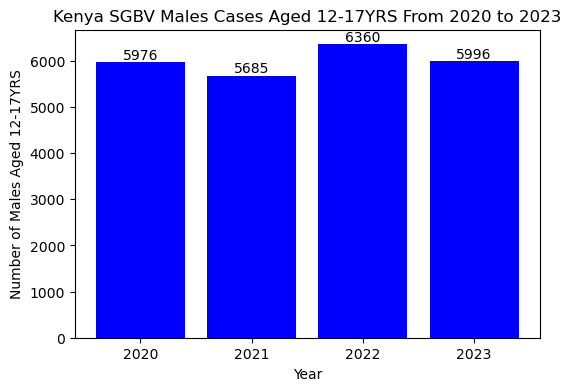

In [77]:
# Filter the data for males aged 0-11 years
male_0_11 = df_pivoted[('12-17YRS', 'MALE')].drop(columns=['0112020'], errors='ignore')
years = df_pivoted['Year']

# Create the bar plot with a smaller size
plt.figure(figsize=(6, 4))  # Smaller graph (6 inches wide, 4 inches tall)
bars = plt.bar(years, male_0_11, color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Males Aged 12-17YRS')
plt.title('Kenya SGBV Males Cases Aged 12-17YRS From 2020 to 2023')

# Add the actual numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    if not np.isnan(yval):  # Check if yval is not NaN
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Display the plot
plt.show()


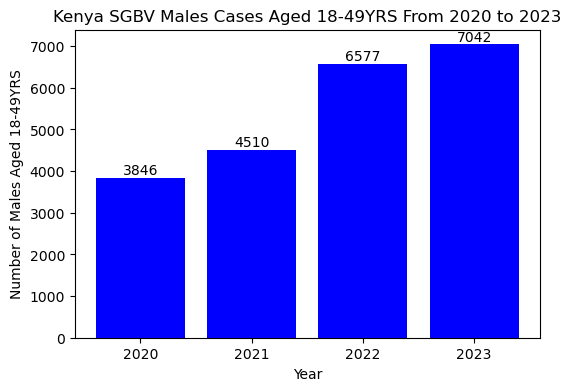

In [78]:
# Filter the data for males aged 0-11 years
male_0_11 = df_pivoted[('18-49YRS', 'MALE')].drop(columns=['0112020'], errors='ignore')
years = df_pivoted['Year']

# Create the bar plot with a smaller size
plt.figure(figsize=(6, 4))  # Smaller graph (6 inches wide, 4 inches tall)
bars = plt.bar(years, male_0_11, color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Males Aged 18-49YRS')
plt.title('Kenya SGBV Males Cases Aged 18-49YRS From 2020 to 2023')

# Add the actual numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    if not np.isnan(yval):  # Check if yval is not NaN
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Display the plot
plt.show()


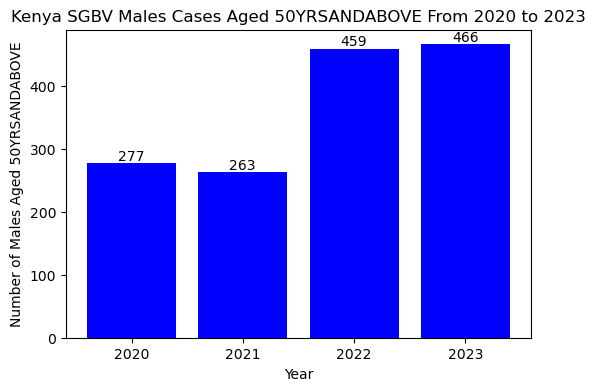

In [79]:
# Filter the data for males aged 0-11 years
male_0_11 = df_pivoted[('50YRSANDABOVE', 'MALE')].drop(columns=['0112020'], errors='ignore')
years = df_pivoted['Year']

# Create the bar plot with a smaller size
plt.figure(figsize=(6, 4))  # Smaller graph (6 inches wide, 4 inches tall)
bars = plt.bar(years, male_0_11, color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Males Aged 50YRSANDABOVE')
plt.title('Kenya SGBV Males Cases Aged 50YRSANDABOVE From 2020 to 2023')

# Add the actual numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    if not np.isnan(yval):  # Check if yval is not NaN
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Display the plot
plt.show()


### Female graphs

In [80]:
import pandas as pd

# Example DataFrame creation (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Uncomment this if you're reading from a CSV file

# Define years
years = ['2020', '2021', '2022', '2023']

# Initialize a list to collect data for each year
data_list = []

# Loop over each year to extract and reshape data
for year in years:
    # Construct column names for the current year
    cols_male_0_11 = f'0-11YRS,MALE{year}'
    cols_female_0_11 = f'0-11YRS,FEMALE{year}'
    
    cols_male_12_17 = f'12-17YRS,MALE{year}'
    cols_female_12_17 = f'12-17YRS,FEMALE{year}'
    
    cols_male_18_49 = f'18-49YRS,MALE{year}'
    cols_female_18_49 = f'18-49YRS,FEMALE{year}'
    
    cols_male_50_above = f'50YRSANDABOVE,MALE{year}'
    cols_female_50_above = f'50YRSANDABOVE,FEMALE{year}'
    
    # Debug: Print column names being accessed
    print(f'Accessing columns for year {year}:')
    print(cols_male_0_11, cols_female_0_11)
    print(cols_male_12_17, cols_female_12_17)
    print(cols_male_18_49, cols_female_18_49)
    print(cols_male_50_above, cols_female_50_above)
    
    # Check if columns exist and extract data
    data = {
        'Year': year,
        '0-11YRS_MALE': df[cols_male_0_11].values[0] if cols_male_0_11 in df.columns and not df[cols_male_0_11].isnull().all() else None,
        '0-11YRS_FEMALE': df[cols_female_0_11].values[0] if cols_female_0_11 in df.columns and not df[cols_female_0_11].isnull().all() else None,
        '12-17YRS_MALE': df[cols_male_12_17].values[0] if cols_male_12_17 in df.columns and not df[cols_male_12_17].isnull().all() else None,
        '12-17YRS_FEMALE': df[cols_female_12_17].values[0] if cols_female_12_17 in df.columns and not df[cols_female_12_17].isnull().all() else None,
        '18-49YRS_MALE': df[cols_male_18_49].values[0] if cols_male_18_49 in df.columns and not df[cols_male_18_49].isnull().all() else None,
        '18-49YRS_FEMALE': df[cols_female_18_49].values[0] if cols_female_18_49 in df.columns and not df[cols_female_18_49].isnull().all() else None,
        '50YRSANDABOVE_MALE': df[cols_male_50_above].values[0] if cols_male_50_above in df.columns and not df[cols_male_50_above].isnull().all() else None,
        '50YRSANDABOVE_FEMALE': df[cols_female_50_above].values[0] if cols_female_50_above in df.columns and not df[cols_female_50_above].isnull().all() else None
    }
    
    # Debug: Print extracted data
    print(f'Data for year {year}:')
    print(data)
    
    # Append the data to the list
    data_list.append(pd.DataFrame([data]))

# Concatenate all data frames in the list
reshaped_df = pd.concat(data_list, ignore_index=True)

# Set 'Year' as index
reshaped_df.set_index('Year', inplace=True)

# Display the reshaped DataFrame
print(reshaped_df)


Accessing columns for year 2020:
0-11YRS,MALE2020 0-11YRS,FEMALE2020
12-17YRS,MALE2020 12-17YRS,FEMALE2020
18-49YRS,MALE2020 18-49YRS,FEMALE2020
50YRSANDABOVE,MALE2020 50YRSANDABOVE,FEMALE2020
Data for year 2020:
{'Year': '2020', '0-11YRS_MALE': 0.0, '0-11YRS_FEMALE': 0.0, '12-17YRS_MALE': 0.0, '12-17YRS_FEMALE': 1.0, '18-49YRS_MALE': 0.0, '18-49YRS_FEMALE': 1.0, '50YRSANDABOVE_MALE': 0.0, '50YRSANDABOVE_FEMALE': 0.0}
Accessing columns for year 2021:
0-11YRS,MALE2021 0-11YRS,FEMALE2021
12-17YRS,MALE2021 12-17YRS,FEMALE2021
18-49YRS,MALE2021 18-49YRS,FEMALE2021
50YRSANDABOVE,MALE2021 50YRSANDABOVE,FEMALE2021
Data for year 2021:
{'Year': '2021', '0-11YRS_MALE': 0.0, '0-11YRS_FEMALE': 0.0, '12-17YRS_MALE': 0.0, '12-17YRS_FEMALE': 2.0, '18-49YRS_MALE': 0.0, '18-49YRS_FEMALE': 0.0, '50YRSANDABOVE_MALE': 0.0, '50YRSANDABOVE_FEMALE': 0.0}
Accessing columns for year 2022:
0-11YRS,MALE2022 0-11YRS,FEMALE2022
12-17YRS,MALE2022 12-17YRS,FEMALE2022
18-49YRS,MALE2022 18-49YRS,FEMALE2022
50YRSANDABO

In [81]:
reshaped_df.head()

,0-11YRS_MALE,0-11YRS_FEMALE,12-17YRS_MALE,12-17YRS_FEMALE,18-49YRS_MALE,18-49YRS_FEMALE,50YRSANDABOVE_MALE,50YRSANDABOVE_FEMALE
Year,,,,,,,,
2020,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2021,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2022,0.0,7.0,0.0,13.0,6.0,16.0,1.0,1.0
2023,0.0,5.0,0.0,9.0,2.0,23.0,1.0,5.0
